In [1]:
import os
import numpy as np 
import itertools
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.markers import MarkerStyle

plt.style.use('default')
plt.rcParams.update({"text.usetex": True,
    "font.family": "sans-serif",
    "axes.formatter.use_mathtext": True,
    "axes.formatter.limits": (-3, 3)
})
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

## Injections

In [2]:
mchirpratio, snrratio = [.5, 1., 2.], [.5, 1., 2.]
delta_tc = [-1., -.5, -.3, -.2, -.1, .1, .2, .3, .5, 1.]

combinations = list(itertools.product(mchirpratio, snrratio, delta_tc))

data_a, data_b = [], []
mchirp_a, mchirp_b = np.zeros(len(combinations)), np.zeros(len(combinations))
eta_a, eta_b = np.zeros(len(combinations)), np.zeros(len(combinations))
eff_spin_a, eff_spin_b = np.zeros(len(combinations)), np.zeros(len(combinations))
delta_tc, snr_a, snr_b = np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations))

for i in range(len(combinations)):
    data_a.append(np.load('../../output/pe_population/injections/SINGLES_A_{}_{}_{}.npy'.format(combinations[i][0], combinations[i][1], combinations[i][2]), allow_pickle=True).item())
    data_b.append(np.load('../../output/pe_population/injections/SINGLES_B_{}_{}_{}.npy'.format(combinations[i][0], combinations[i][1], combinations[i][2]), allow_pickle=True).item())

    mchirp_a[i], mchirp_b[i] = np.power(data_a[i]['mass_1']*data_a[i]['mass_2'], (3/5))/np.power(data_a[i]['mass_1']+data_a[i]['mass_2'], (1/5)), np.power(data_b[i]['mass_1']*data_b[i]['mass_2'], (3/5))/np.power(data_b[i]['mass_1']+data_b[i]['mass_2'], (1/5))
    eta_a[i], eta_b[i] = (data_a[i]['mass_1']*data_a[i]['mass_2'])/np.power(data_a[i]['mass_1']+data_a[i]['mass_2'], 2), (data_b[i]['mass_1']*data_b[i]['mass_2'])/np.power(data_b[i]['mass_1']+data_b[i]['mass_2'], 2)
    eff_spin_a[i], eff_spin_b[i] = data_a[i]['a_1'], data_b[i]['a_1']

    delta_tc[i] = data_b[i]['geocent_time'] - data_a[i]['geocent_time']
    snr_a[i], snr_b[i] = data_a[i]['snr_det'], data_b[i]['snr_det']

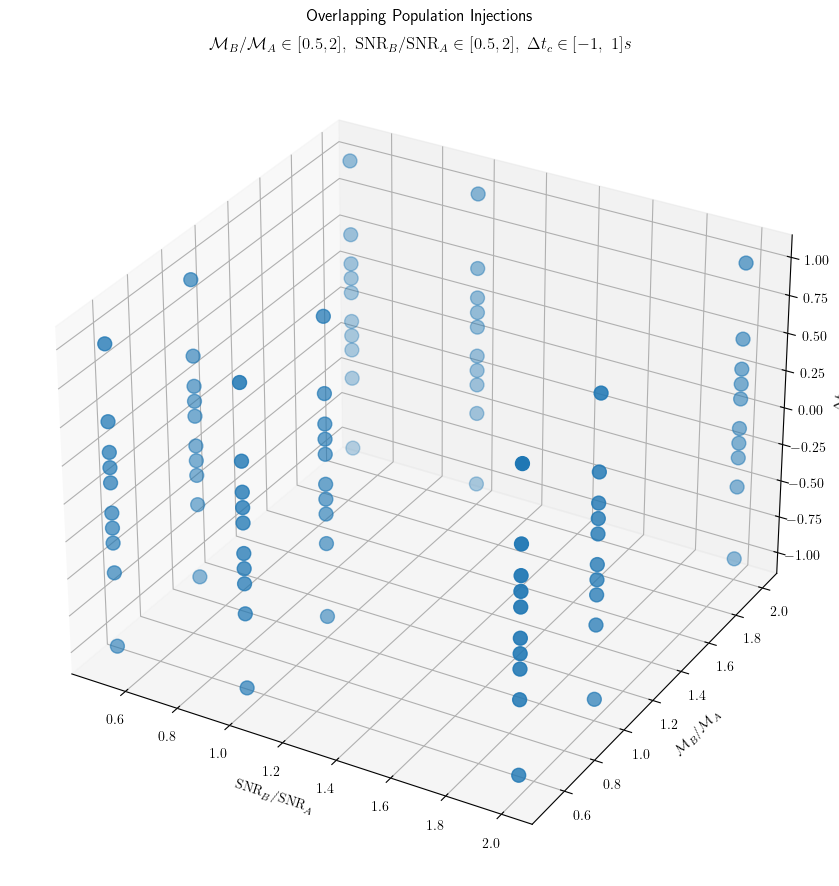

In [3]:
fig, axes = plt.subplots(1, 1, figsize=(12, 9), subplot_kw={'projection': '3d'})
axes.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, s=100)
axes.set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes.set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes.set_zlabel('$\Delta t_c$')
axes.ticklabel_format(useOffset=False, style='plain')
axes.set_title('$\\mathcal{M}_B/\\mathcal{M}_A\\in[0.5,2], \ \\mathrm{SNR}_B/\\mathrm{SNR}_A\\in[0.5,2], \ \\Delta t_c\\in[-1,\ 1]s$')
plt.suptitle('Overlapping Population Injections')
plt.savefig('../../output/pe_population/match/INJECTIONS.png')
plt.tight_layout()
plt.show()

## Microlensing Recovery

In [4]:
match_ml, mchirp_ml, eta_ml, spin1z_ml, spin2z_ml, Ml_z_ml, y_ml = np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations))
for i in range(len(combinations)):
    data = np.load('../../output/pe_population/FF/FF_ML_6D_H1_{}_{}_{}.npy'.format(combinations[i][0], combinations[i][1], combinations[i][2]), allow_pickle=True)
    match_ml[i], mchirp_ml[i], eta_ml[i], spin1z_ml[i], spin2z_ml[i], Ml_z_ml[i], y_ml[i] = data[0], data[1], data[2], data[3], data[4], data[5], data[6]

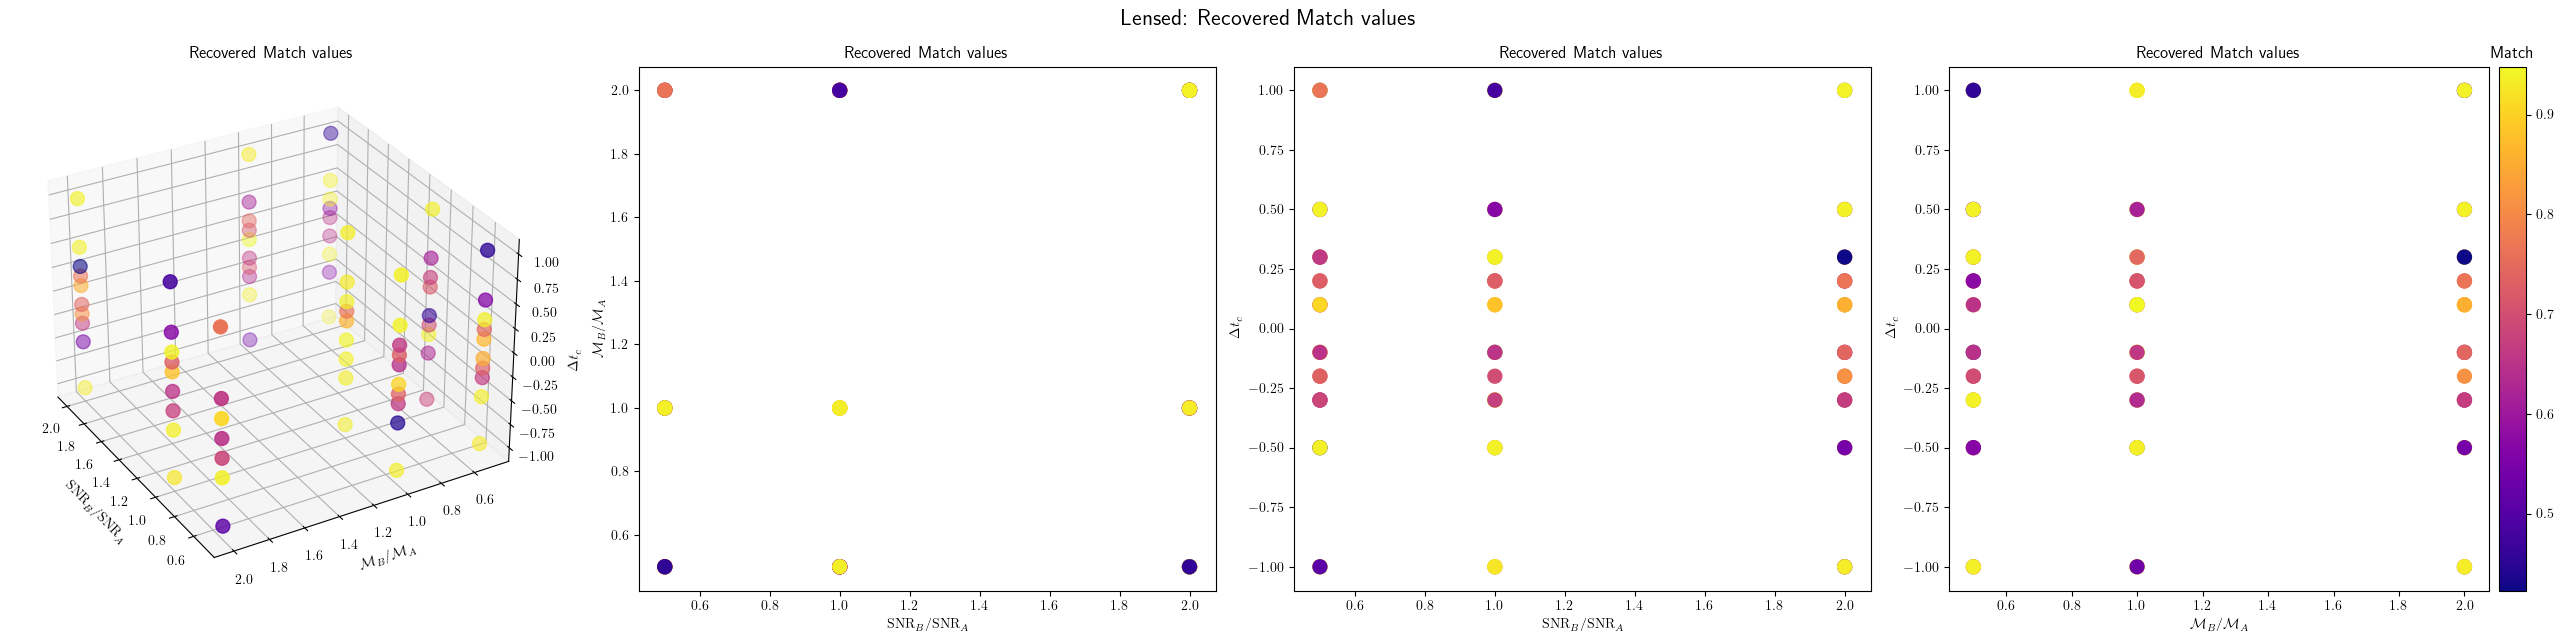

In [5]:
fig = plt.figure(figsize=(26, 6.5))
axs = [None]*4

axs[0] = fig.add_subplot(1, 4, 1, projection='3d')
scatter1 = axs[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ml, edgecolor=None, cmap='plasma', s=100)
axs[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axs[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axs[0].set_zlabel('$\Delta t_c$')
axs[0].set_title('Recovered Match values', loc='center')
axs[0].ticklabel_format(useOffset=False, style='plain')
axs[0].azim = 150

axs[1] = fig.add_subplot(1, 4, 2)
scatter2 = axs[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, c=match_ml, edgecolor=None, cmap='plasma', s=100)
axs[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axs[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axs[1].set_title('Recovered Match values', loc='center')
axs[1].ticklabel_format(useOffset=False, style='plain')

fig.subplots_adjust(wspace=0.6)

axs[2] = fig.add_subplot(1, 4, 3)
scatter3 = axs[2].scatter(snr_b/snr_a, delta_tc, c=match_ml, edgecolor=None, cmap='plasma', s=100)
axs[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axs[2].set_ylabel('$\Delta t_c$')
axs[2].set_title('Recovered Match values', loc='center')
axs[2].ticklabel_format(useOffset=False, style='plain')

axs[3] = fig.add_subplot(1, 4, 4)
scatter4 = axs[3].scatter(mchirp_b/mchirp_a, delta_tc, c=match_ml, edgecolor=None, cmap='plasma', s=100)
axs[3].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axs[3].set_ylabel('$\Delta t_c$')
axs[3].set_title('Recovered Match values', loc='center')
axs[3].ticklabel_format(useOffset=False, style='plain')

divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb2 = plt.colorbar(scatter3, cax=cax)
clb2.ax.set_title('Match')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

plt.suptitle('Lensed: Recovered Match values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/LENS_MATCH(3D).png')
plt.show()

### Chirp Mass $\mathcal{M}$ Bias

In [6]:
bias_mchirp_a_ml = np.abs(mchirp_ml-mchirp_a)/mchirp_a*100
bias_mchirp_b_ml = np.abs(mchirp_ml-mchirp_b)/mchirp_b*100

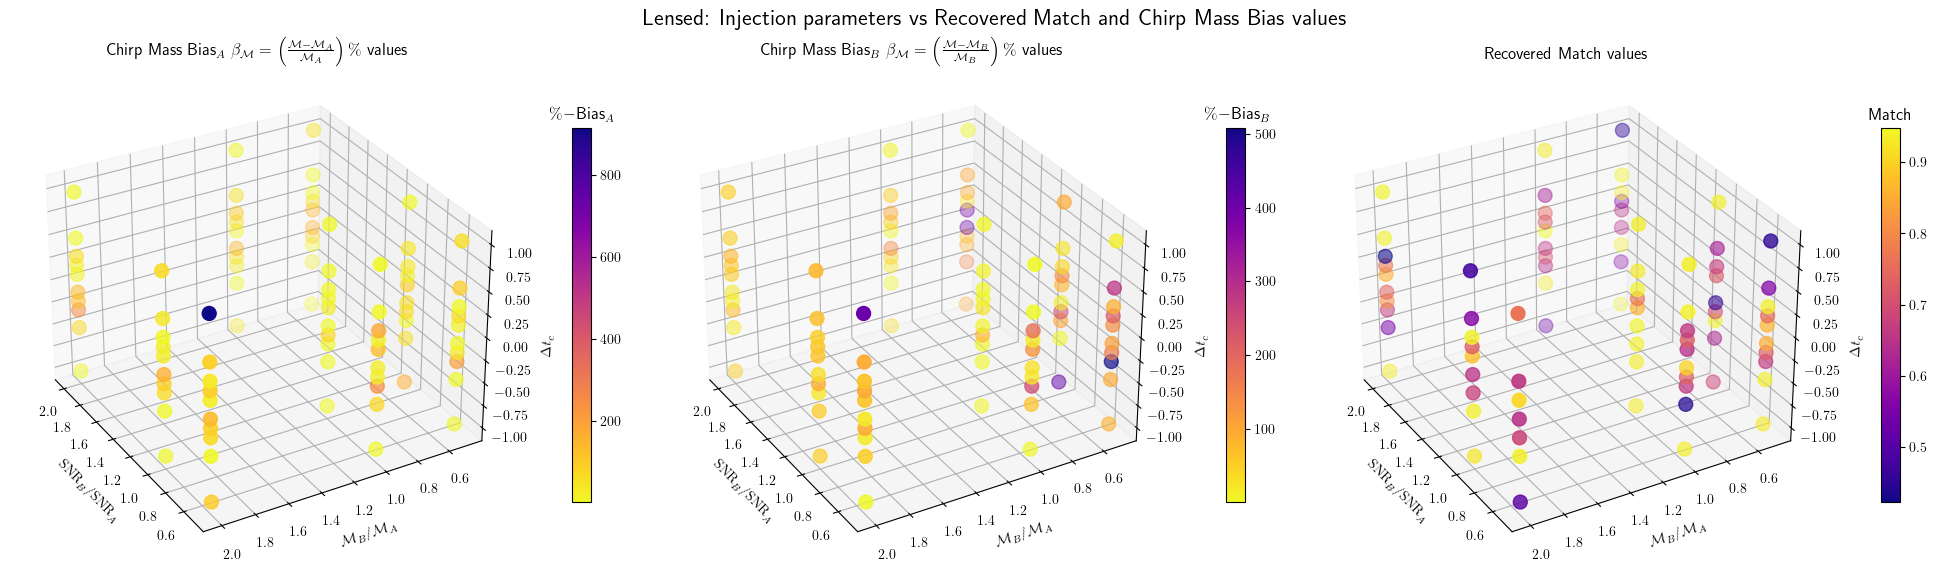

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})

scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_a_ml, edgecolor=None, cmap='plasma_r', s=100)
clb1 = fig.colorbar(scatter1, ax=axes[0], shrink=0.7, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')
clb1.ax.ticklabel_format(useOffset=False, style='plain')

axes[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_zlabel('$\Delta t_c$')
axes[0].set_title('Chirp Mass Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', loc='center')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].azim = 150

scatter2 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b_ml, edgecolor=None, cmap='plasma_r', s=100)
clb2 = fig.colorbar(scatter2, ax=axes[1], shrink=0.7, pad=0.1)
clb2.ax.set_title('$\\%-$Bias$_B$')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

axes[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_zlabel('$\Delta t_c$')
axes[1].set_title('Chirp Mass Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].azim = 150

scatter3 = axes[2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ml, edgecolor=None, cmap='plasma', s=100)
clb3 = fig.colorbar(scatter3, ax=axes[2], shrink=0.7, pad=0.1)
clb3.ax.set_title('Match')
clb3.ax.ticklabel_format(useOffset=False, style='plain')

axes[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2].set_zlabel('$\Delta t_c$')
axes[2].set_title('Recovered Match values', loc='center')
axes[2].ticklabel_format(useOffset=False, style='plain')
axes[2].azim = 150

fig.suptitle('Lensed: Injection parameters vs Recovered Match and Chirp Mass Bias values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/LENS_BIAS_MCHIRP(3D).png')
plt.show()

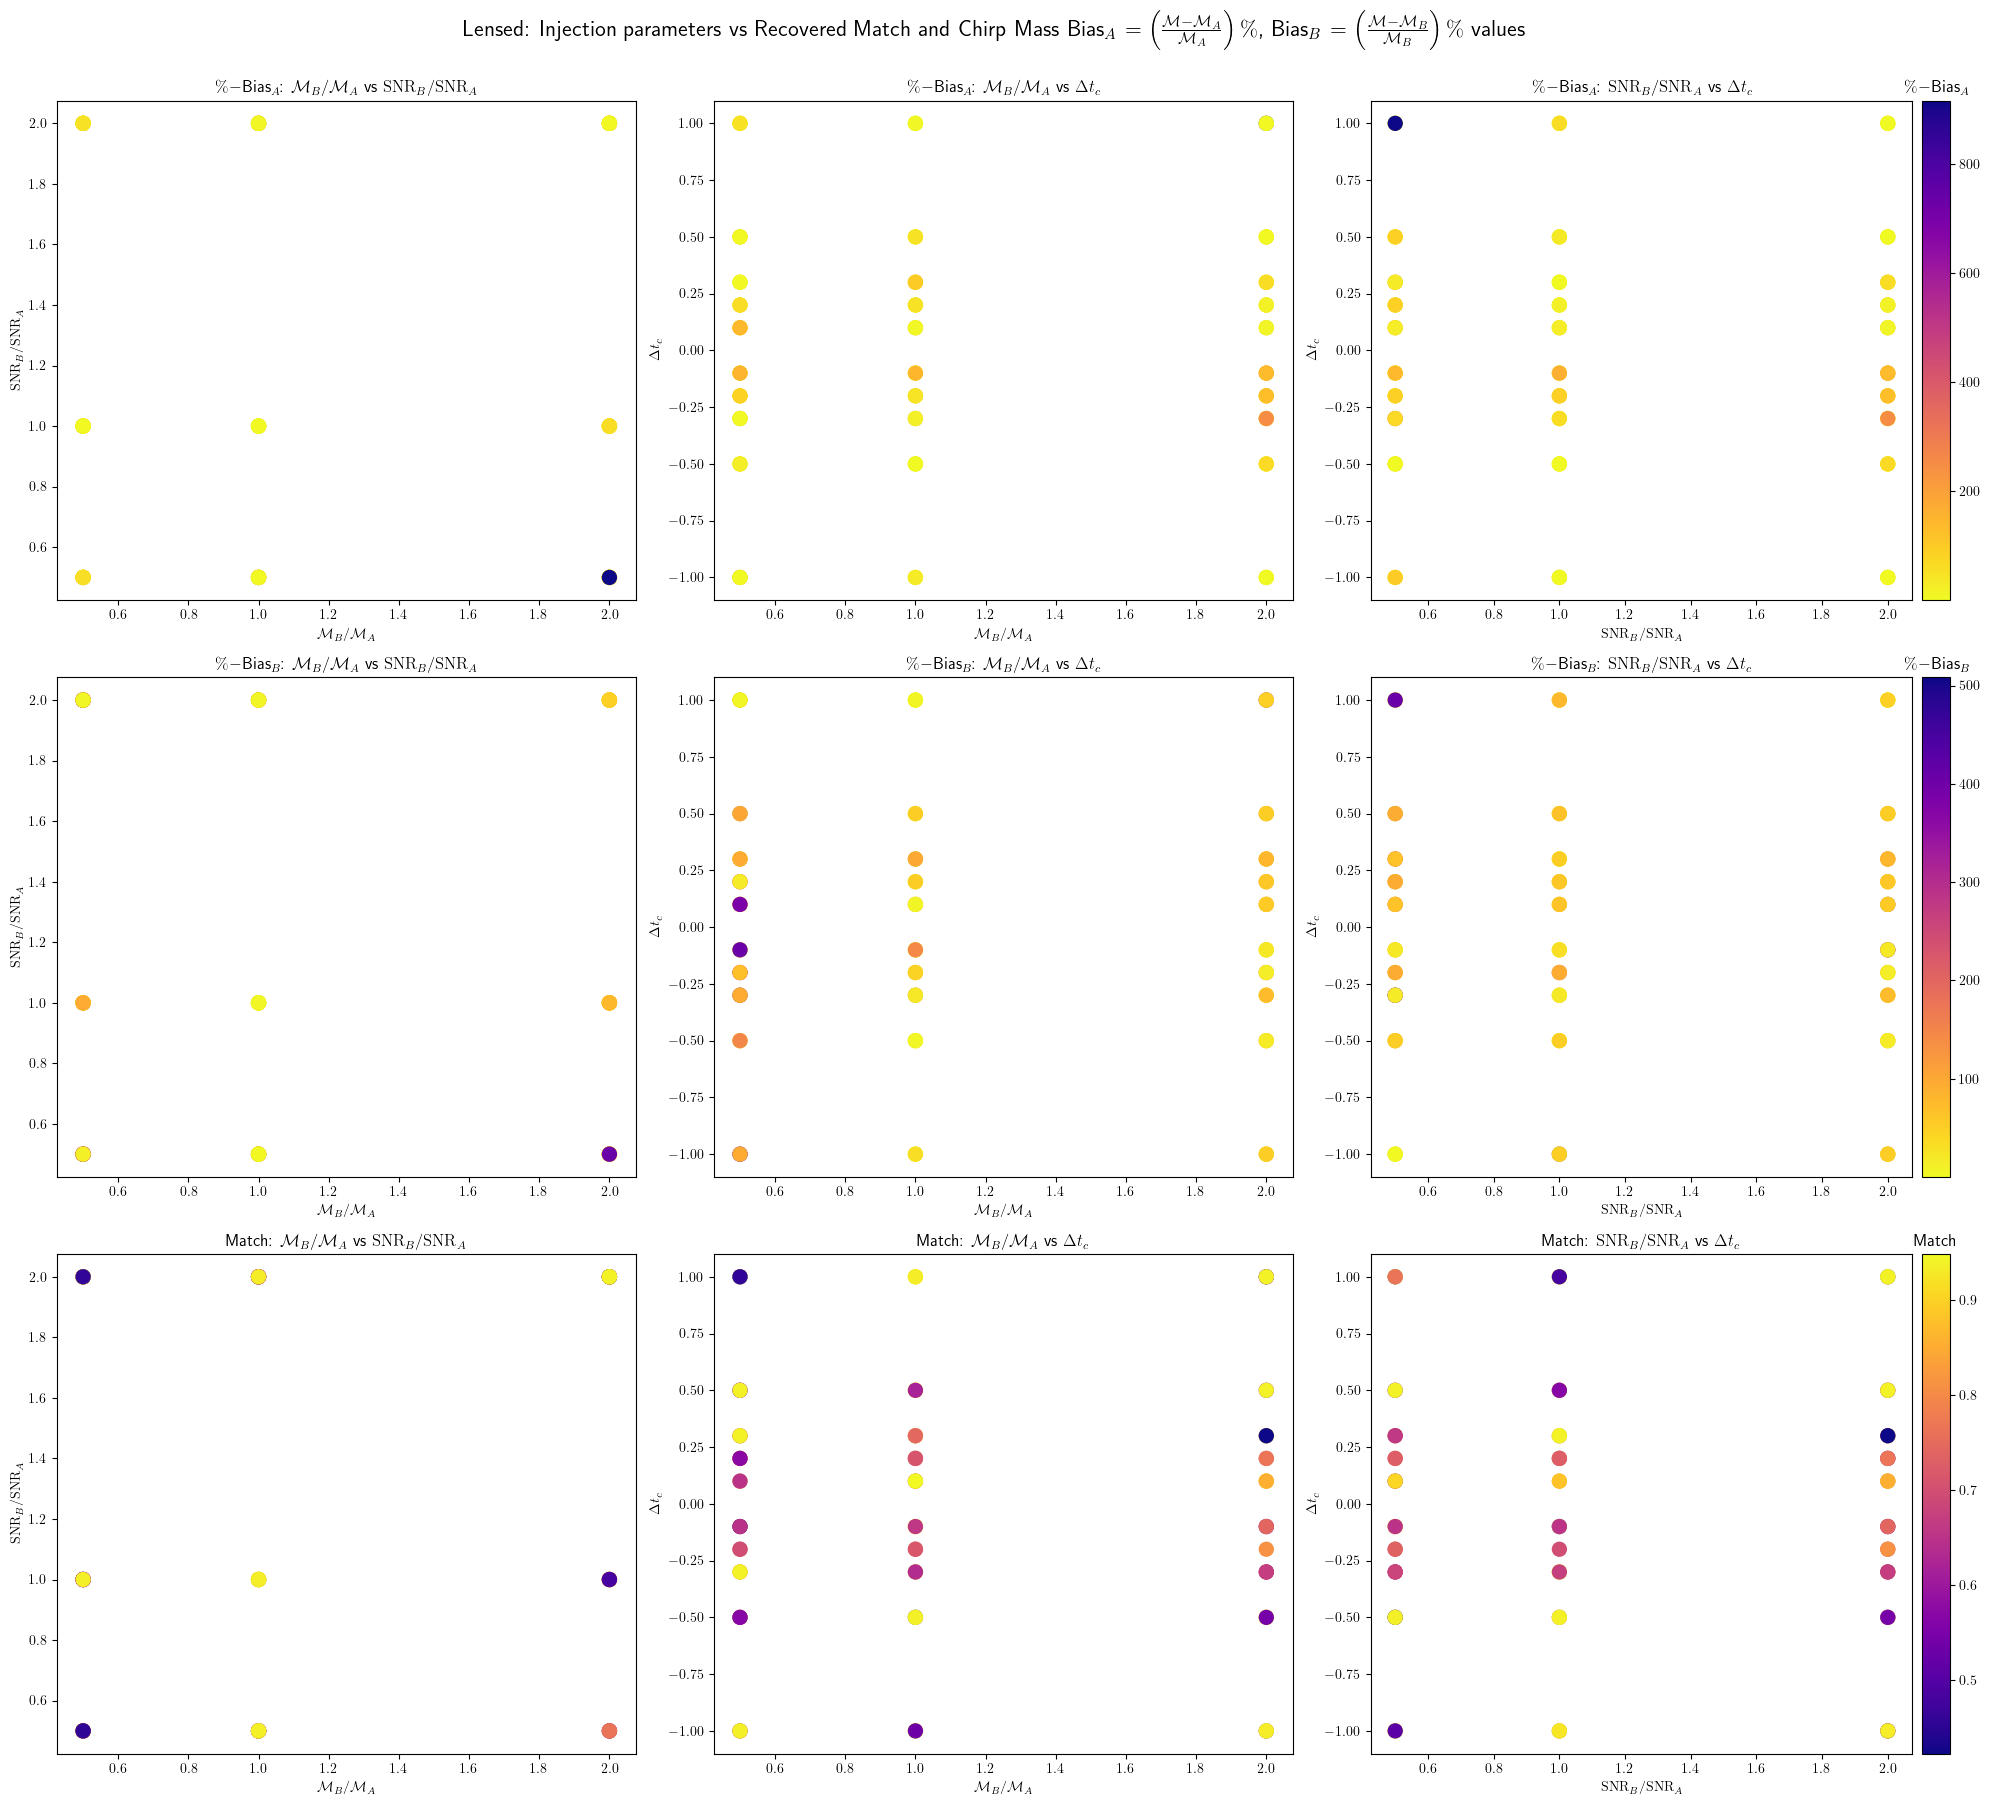

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

scatter11 = axes[0,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp_a_ml, cmap='plasma_r',s=100)
axes[0,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,0].set_title('$\\%-$Bias$_A$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter12 = axes[1,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp_b_ml, cmap='plasma_r', s=100)
axes[1,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,0].set_title('$\\%-$Bias$_B$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter13 = axes[2,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=match_ml, cmap='plasma', s=100)
axes[2,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,0].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter21 = axes[0,1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_a_ml, cmap='plasma_r', s=100)
axes[0,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,1].set_ylabel('$\Delta t_c$')
axes[0,1].set_title('$\\%-$Bias$_A$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter22 = axes[1,1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b_ml, cmap='plasma_r', s=100)
axes[1,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,1].set_ylabel('$\Delta t_c$')
axes[1,1].set_title('$\\%-$Bias$_B$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter32 = axes[2,1].scatter(mchirp_b/mchirp_a, delta_tc, c=match_ml, cmap='plasma', s=100)
axes[2,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,1].set_ylabel('$\Delta t_c$')
axes[2,1].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter31 = axes[0,2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp_a_ml, cmap='plasma_r', s=100)
divider = make_axes_locatable(axes[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb1 = plt.colorbar(scatter31, cax=cax)
clb1.ax.set_title('$\\%-$Bias$_A$')
clb1.ax.ticklabel_format(useOffset=False, style='plain')

axes[0,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,2].set_ylabel('$\Delta t_c$')
axes[0,2].set_title('$\\%-$Bias$_A$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter32 = axes[1,2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp_b_ml, cmap='plasma_r', s=100)
divider = make_axes_locatable(axes[1, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb2 = plt.colorbar(scatter32, cax=cax)
clb2.ax.set_title('$\\%-$Bias$_B$')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

axes[1,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,2].set_ylabel('$\Delta t_c$')
axes[1,2].set_title('$\\%-$Bias$_B$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter33 = axes[2,2].scatter(snr_b/snr_a, delta_tc, c=match_ml, cmap='plasma', s=100)
divider = make_axes_locatable(axes[2, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb3 = plt.colorbar(scatter33, cax=cax)
clb3.ax.set_title('Match')
clb3.ax.ticklabel_format(useOffset=False, style='plain')

axes[2,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,2].set_ylabel('$\Delta t_c$')
axes[2,2].set_title('Match: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

fig.suptitle('Lensed: Injection parameters vs Recovered Match and Chirp Mass Bias$_A$ $=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$, Bias$_B$ $=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', fontsize=16, fontweight='bold', y=1)
plt.tight_layout()
plt.savefig('../../output/pe_population/match/LENS_BIAS_MCHIRP(2D).png')
plt.show()

### Microlensing Parameters: $\log{M_{\ell}^z}$, $y$

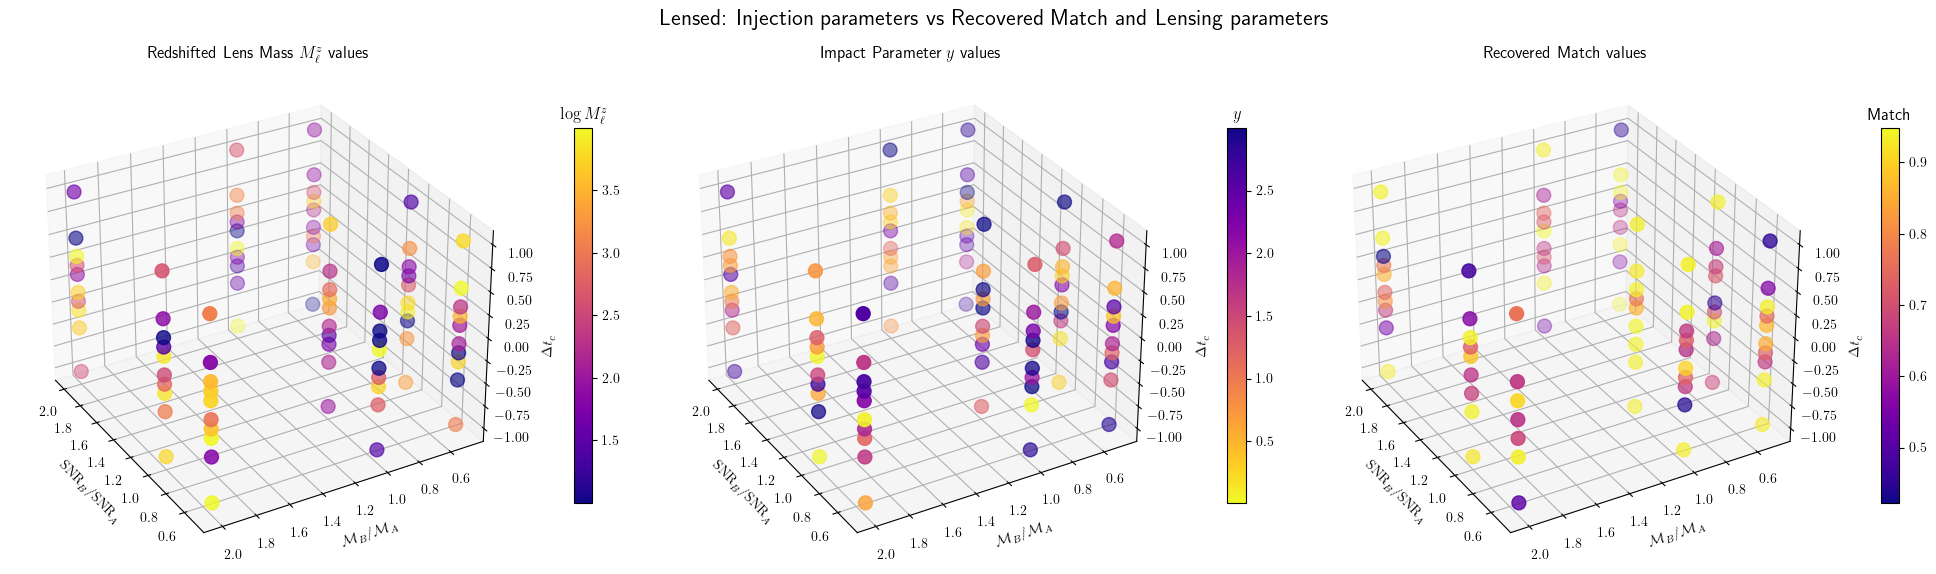

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})

scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=np.log10(Ml_z_ml), edgecolor=None, cmap='plasma', s=100)
clb1 = fig.colorbar(scatter1, ax=axes[0], shrink=0.7, pad=0.1)
clb1.ax.set_title('$\\log M_{\ell}^z$')

axes[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_zlabel('$\Delta t_c$')
axes[0].set_title('Redshifted Lens Mass $M_{\ell}^z$ values', loc='center')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].azim = 150

scatter2 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=y_ml, edgecolor=None, cmap='plasma_r', s=100)
clb2 = fig.colorbar(scatter2, ax=axes[1], shrink=0.7, pad=0.1)
clb2.ax.set_title('$y$')

axes[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_zlabel('$\Delta t_c$')
axes[1].set_title('Impact Parameter $y$ values', loc='center')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].azim = 150

scatter3 = axes[2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ml, edgecolor=None, cmap='plasma', s=100)
clb3 = fig.colorbar(scatter3, ax=axes[2], shrink=0.7, pad=0.1)
clb3.ax.set_title('Match')

axes[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2].set_zlabel('$\Delta t_c$')
axes[2].set_title('Recovered Match values', loc='center')
axes[2].ticklabel_format(useOffset=False, style='plain')
axes[2].azim = 150

fig.suptitle('Lensed: Injection parameters vs Recovered Match and Lensing parameters', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/LENS_PARAMS(3D).png')
plt.show()

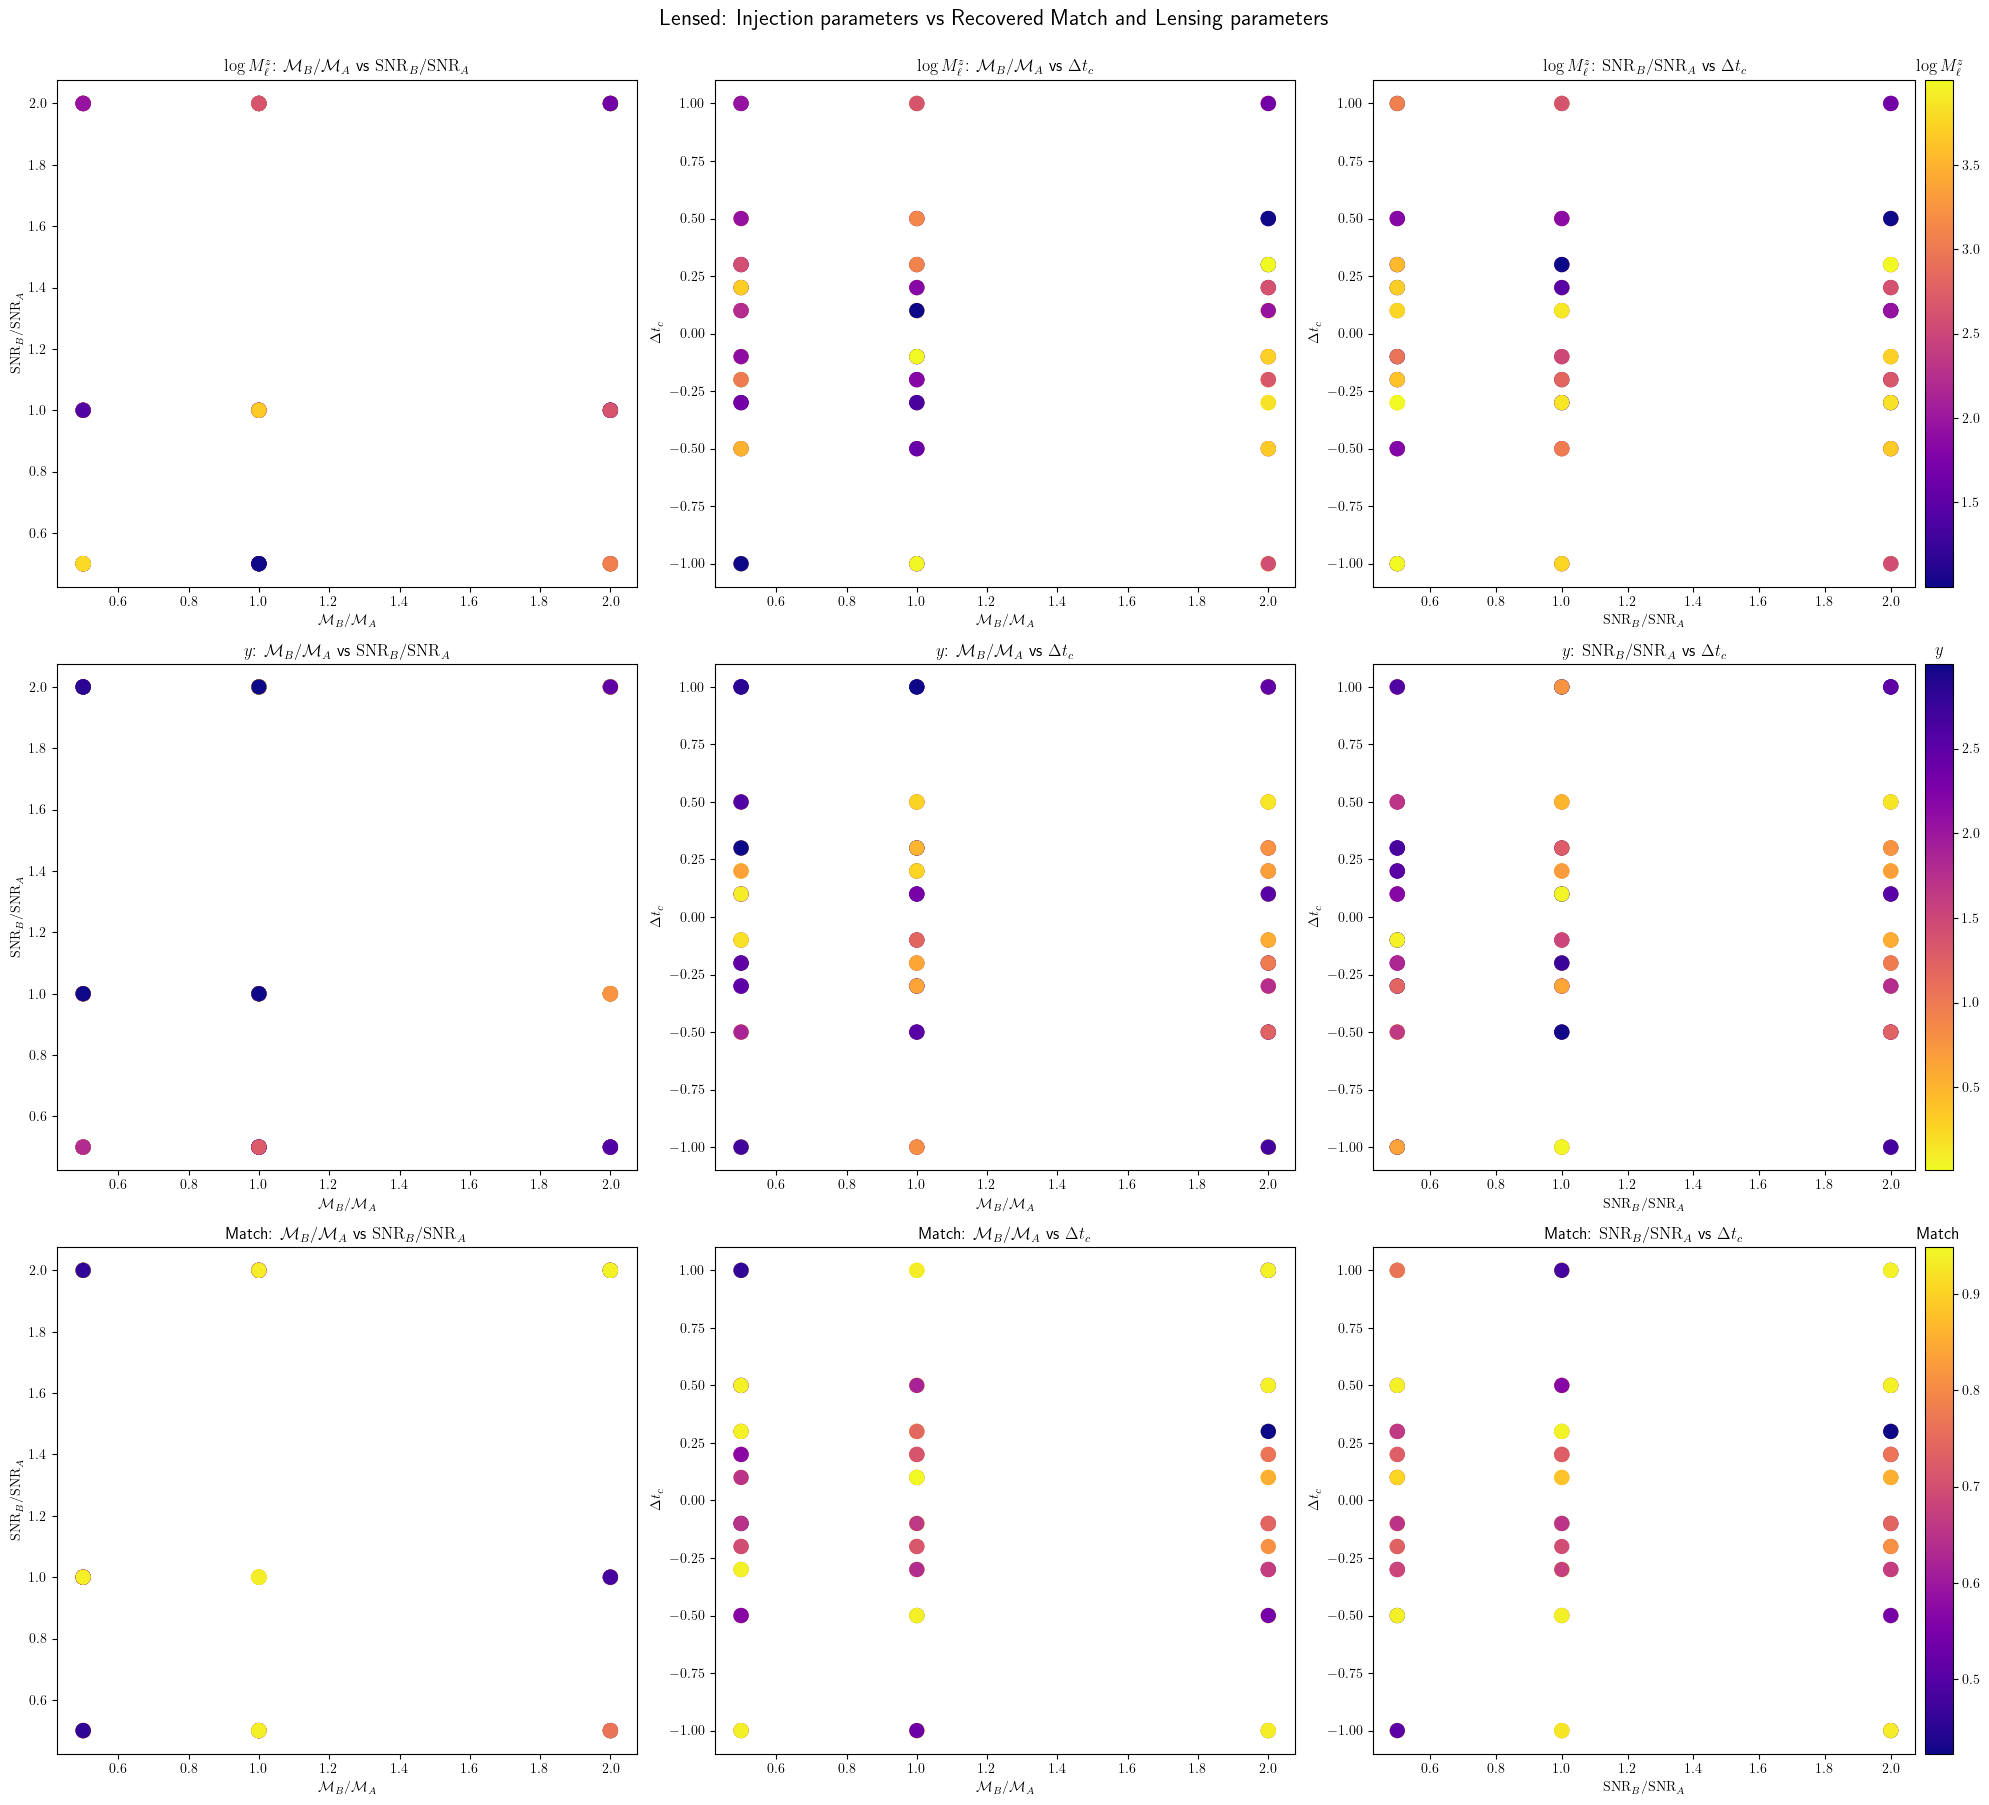

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

scatter11 = axes[0,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=np.log10(Ml_z_ml), cmap='plasma',s=100)
axes[0,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,0].set_title('$\\log M_{\ell}^z$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter12 = axes[1,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=y_ml, cmap='plasma_r', s=100)
axes[1,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,0].set_title('$y$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter13 = axes[2,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=match_ml, cmap='plasma', s=100)
axes[2,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,0].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter21 = axes[0,1].scatter(mchirp_b/mchirp_a, delta_tc, c=np.log10(Ml_z_ml), cmap='plasma', s=100)
axes[0,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,1].set_ylabel('$\Delta t_c$')
axes[0,1].set_title('$\\log M_{\ell}^z$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter22 = axes[1,1].scatter(mchirp_b/mchirp_a, delta_tc, c=y_ml, cmap='plasma_r', s=100)
axes[1,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,1].set_ylabel('$\Delta t_c$')
axes[1,1].set_title('$y$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter32 = axes[2,1].scatter(mchirp_b/mchirp_a, delta_tc, c=match_ml, cmap='plasma', s=100)
axes[2,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,1].set_ylabel('$\Delta t_c$')
axes[2,1].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter31 = axes[0,2].scatter(snr_b/snr_a, delta_tc, c=np.log10(Ml_z_ml), cmap='plasma', s=100)
divider = make_axes_locatable(axes[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb1 = plt.colorbar(scatter31, cax=cax)
clb1.ax.set_title('$\\log M_{\ell}^z$')
axes[0,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,2].set_ylabel('$\Delta t_c$')
axes[0,2].set_title('$\\log M_{\ell}^z$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter32 = axes[1,2].scatter(snr_b/snr_a, delta_tc, c=y_ml, cmap='plasma_r', s=100)
divider = make_axes_locatable(axes[1, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb2 = plt.colorbar(scatter32, cax=cax)
clb2.ax.set_title('$y$')
axes[1,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,2].set_ylabel('$\Delta t_c$')
axes[1,2].set_title('$y$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter33 = axes[2,2].scatter(snr_b/snr_a, delta_tc, c=match_ml, cmap='plasma', s=100)
divider = make_axes_locatable(axes[2, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb3 = plt.colorbar(scatter33, cax=cax)
clb3.ax.set_title('Match')
axes[2,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,2].set_ylabel('$\Delta t_c$')
axes[2,2].set_title('Match: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

fig.suptitle('Lensed: Injection parameters vs Recovered Match and Lensing parameters', fontsize=16, fontweight='bold', y=1)
plt.tight_layout()
plt.savefig('../../output/pe_population/match/LENS_PARAMS(2D).png')
plt.show()

## Eccentric Recovery

In [11]:
match_ecc, mchirp_ecc, eta_ecc, spin1z_ecc, spin2z_ecc, e_ecc = np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations))
for i in range(len(combinations)):
    data = np.load('../../output/pe_population/FF/FF_ECC_5D_H1_{}_{}_{}.npy'.format(combinations[i][0], combinations[i][1], combinations[i][2]), allow_pickle=True)
    match_ecc[i], mchirp_ecc[i], eta_ecc[i], spin1z_ecc[i], spin2z_ecc[i], e_ecc[i] = data[0], data[1], data[2], data[3], data[4], data[5]

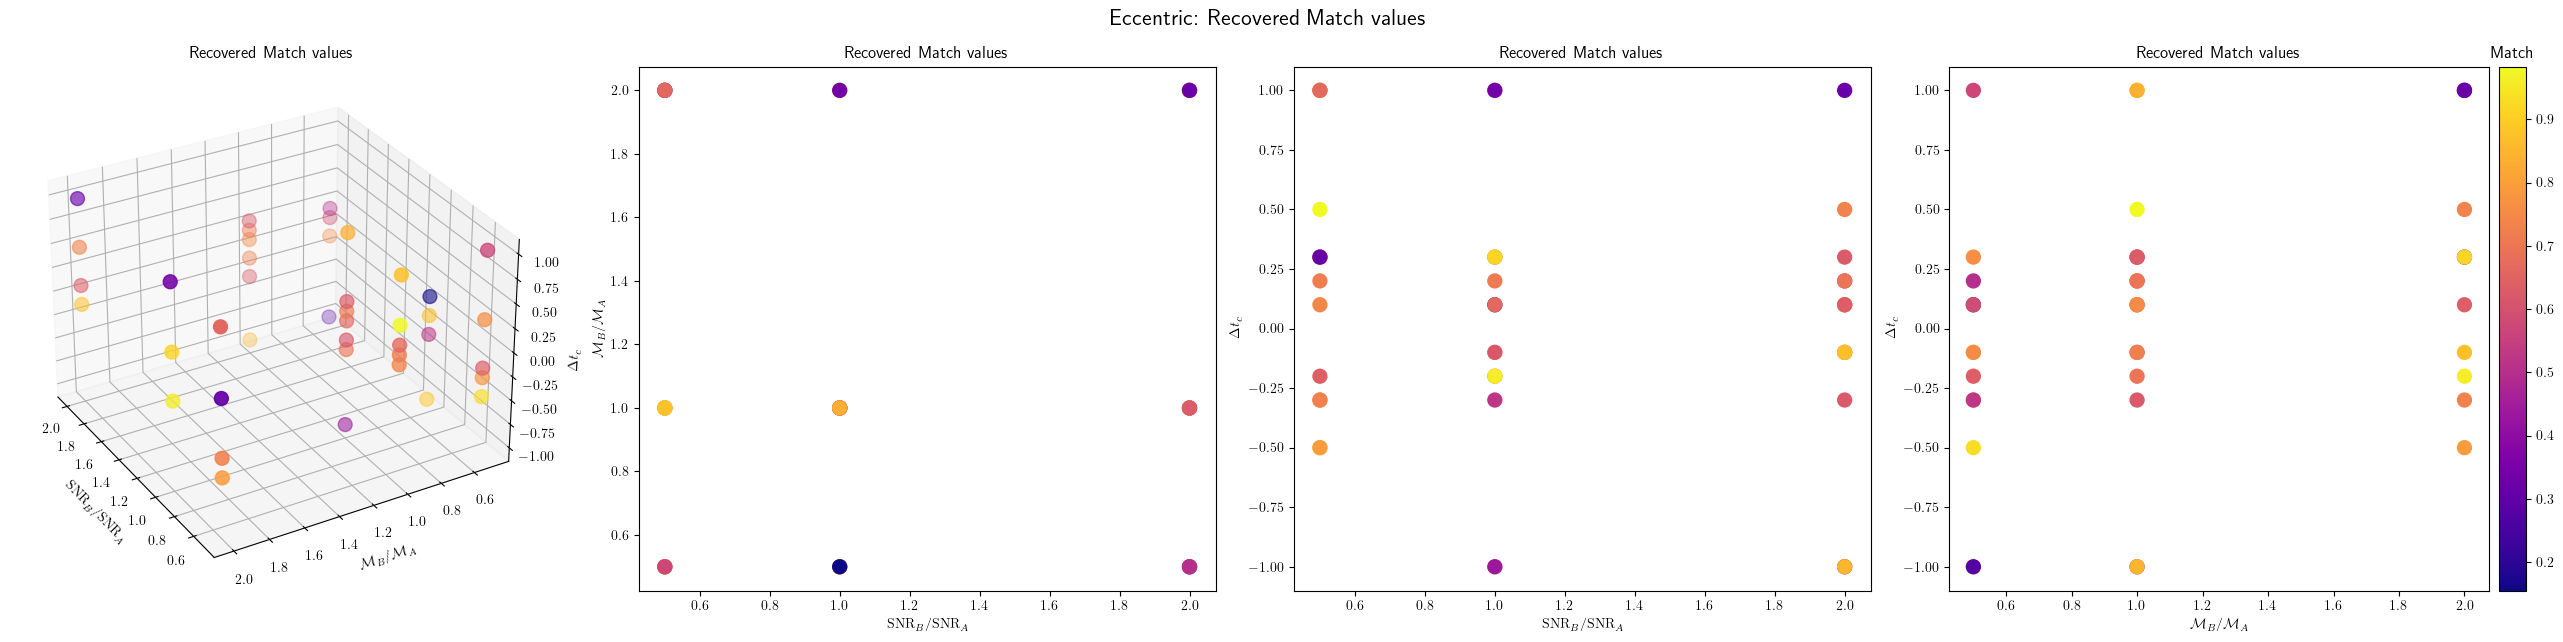

In [12]:
fig = plt.figure(figsize=(26, 6.5))
axs = [None]*4

axs[0] = fig.add_subplot(1, 4, 1, projection='3d')
scatter1 = axs[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ecc, edgecolor=None, cmap='plasma', s=100)
axs[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axs[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axs[0].set_zlabel('$\Delta t_c$')
axs[0].set_title('Recovered Match values', loc='center')
axs[0].ticklabel_format(useOffset=False, style='plain')
axs[0].azim = 150

axs[1] = fig.add_subplot(1, 4, 2)
scatter2 = axs[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, c=match_ecc, edgecolor=None, cmap='plasma', s=100)
axs[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axs[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axs[1].set_title('Recovered Match values', loc='center')
axs[1].ticklabel_format(useOffset=False, style='plain')

fig.subplots_adjust(wspace=0.6)

axs[2] = fig.add_subplot(1, 4, 3)
scatter3 = axs[2].scatter(snr_b/snr_a, delta_tc, c=match_ecc, edgecolor=None, cmap='plasma', s=100)
axs[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axs[2].set_ylabel('$\Delta t_c$')
axs[2].set_title('Recovered Match values', loc='center')
axs[2].ticklabel_format(useOffset=False, style='plain')

axs[3] = fig.add_subplot(1, 4, 4)
scatter4 = axs[3].scatter(mchirp_b/mchirp_a, delta_tc, c=match_ecc, edgecolor=None, cmap='plasma', s=100)
axs[3].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axs[3].set_ylabel('$\Delta t_c$')
axs[3].set_title('Recovered Match values', loc='center')
axs[3].ticklabel_format(useOffset=False, style='plain')

divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb2 = plt.colorbar(scatter3, cax=cax)
clb2.ax.set_title('Match')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

plt.suptitle('Eccentric: Recovered Match values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/ECC_MATCH(3D).png')
plt.show()

### Chirp Mass $\mathcal{M}$ Bias

In [13]:
bias_mchirp_a_ecc = np.abs(mchirp_ecc-mchirp_a)/mchirp_a*100
bias_mchirp_b_ecc = np.abs(mchirp_ecc-mchirp_b)/mchirp_b*100

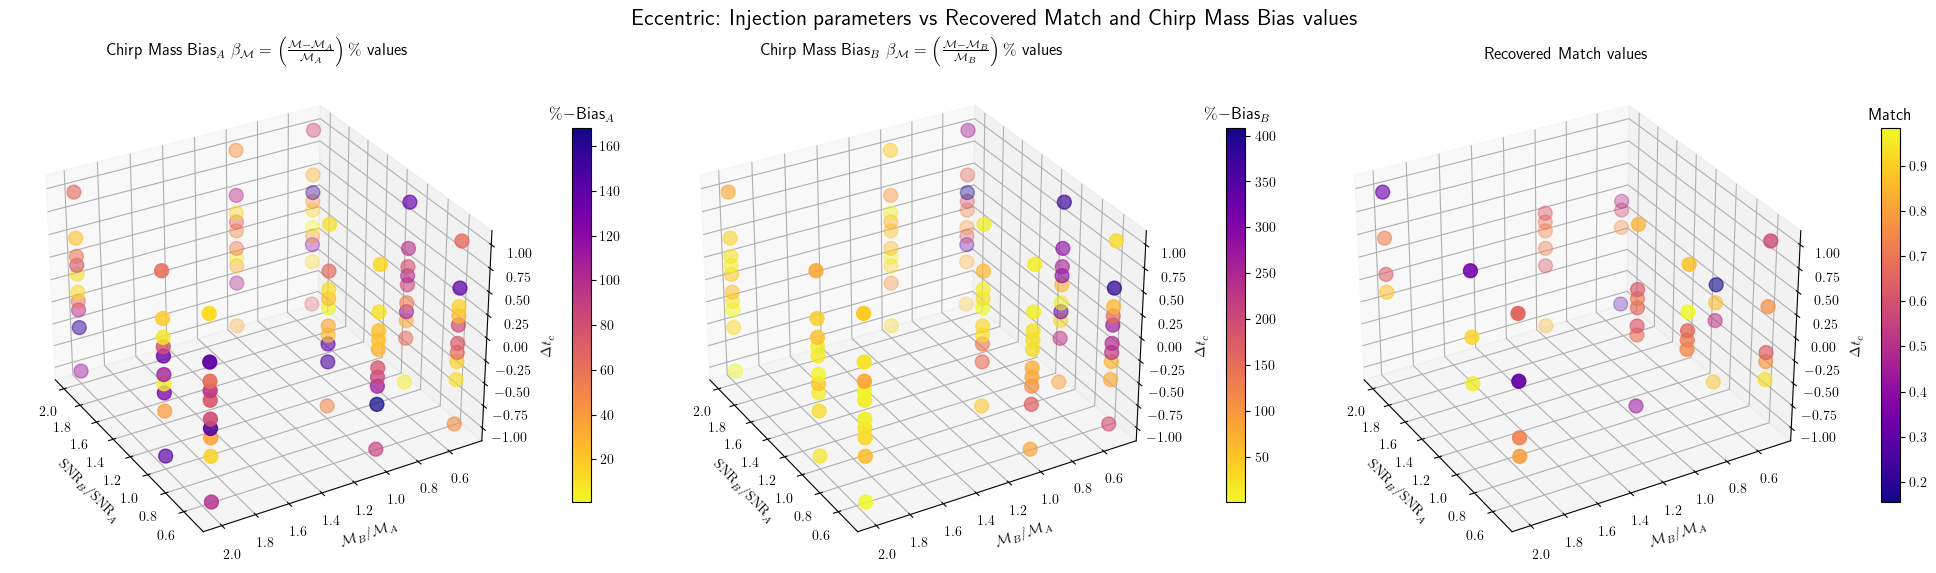

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})

scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_a_ecc, edgecolor=None, cmap='plasma_r', s=100)
clb1 = fig.colorbar(scatter1, ax=axes[0], shrink=0.7, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')
clb1.ax.ticklabel_format(useOffset=False, style='plain')

axes[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_zlabel('$\Delta t_c$')
axes[0].set_title('Chirp Mass Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', loc='center')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].azim = 150

scatter2 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b_ecc, edgecolor=None, cmap='plasma_r', s=100)
clb2 = fig.colorbar(scatter2, ax=axes[1], shrink=0.7, pad=0.1)
clb2.ax.set_title('$\\%-$Bias$_B$')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

axes[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_zlabel('$\Delta t_c$')
axes[1].set_title('Chirp Mass Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].azim = 150

scatter3 = axes[2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ecc, edgecolor=None, cmap='plasma', s=100)
clb3 = fig.colorbar(scatter3, ax=axes[2], shrink=0.7, pad=0.1)
clb3.ax.set_title('Match')
clb3.ax.ticklabel_format(useOffset=False, style='plain')

axes[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2].set_zlabel('$\Delta t_c$')
axes[2].set_title('Recovered Match values', loc='center')
axes[2].ticklabel_format(useOffset=False, style='plain')
axes[2].azim = 150

fig.suptitle('Eccentric: Injection parameters vs Recovered Match and Chirp Mass Bias values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/ECC_BIAS_MCHIRP(3D).png')
plt.show()

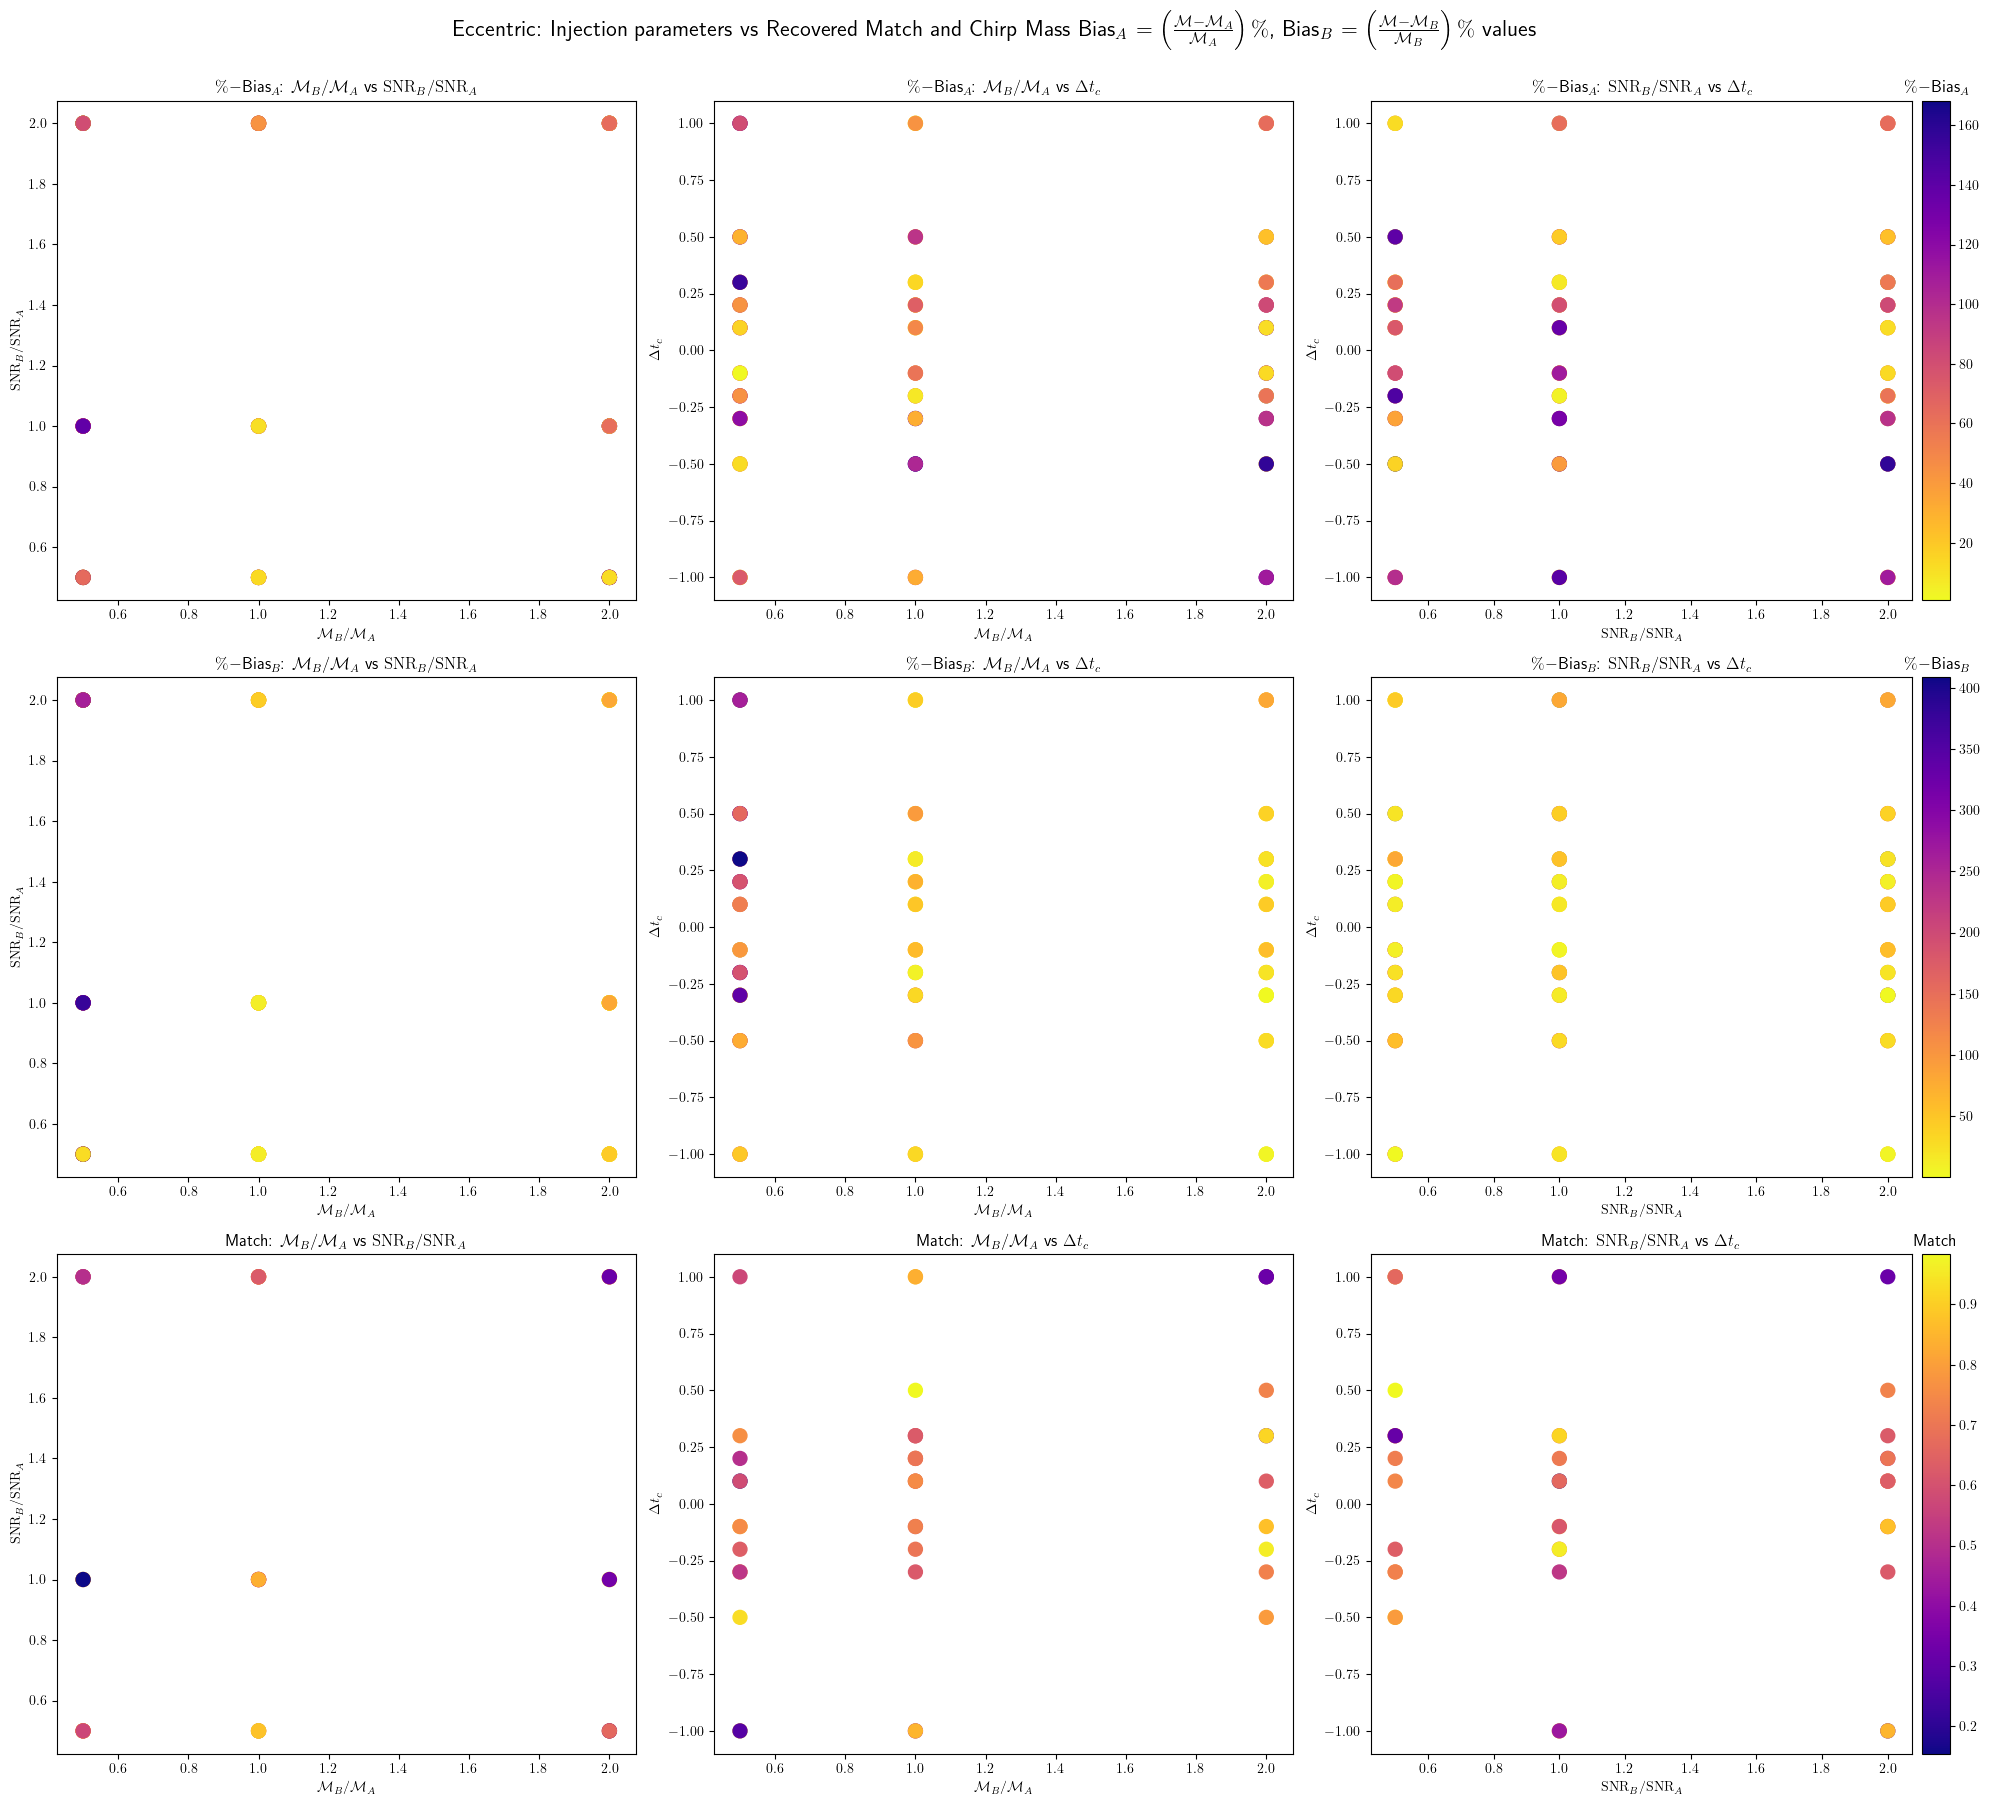

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

scatter11 = axes[0,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp_a_ecc, cmap='plasma_r',s=100)
axes[0,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,0].set_title('$\\%-$Bias$_A$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter12 = axes[1,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp_b_ecc, cmap='plasma_r', s=100)
axes[1,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,0].set_title('$\\%-$Bias$_B$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter13 = axes[2,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=match_ecc, cmap='plasma', s=100)
axes[2,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,0].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter21 = axes[0,1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_a_ecc, cmap='plasma_r', s=100)
axes[0,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,1].set_ylabel('$\Delta t_c$')
axes[0,1].set_title('$\\%-$Bias$_A$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter22 = axes[1,1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b_ecc, cmap='plasma_r', s=100)
axes[1,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,1].set_ylabel('$\Delta t_c$')
axes[1,1].set_title('$\\%-$Bias$_B$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter32 = axes[2,1].scatter(mchirp_b/mchirp_a, delta_tc, c=match_ecc, cmap='plasma', s=100)
axes[2,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,1].set_ylabel('$\Delta t_c$')
axes[2,1].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter31 = axes[0,2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp_a_ecc, cmap='plasma_r', s=100)
divider = make_axes_locatable(axes[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb1 = plt.colorbar(scatter31, cax=cax)
clb1.ax.set_title('$\\%-$Bias$_A$')
clb1.ax.ticklabel_format(useOffset=False, style='plain')

axes[0,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,2].set_ylabel('$\Delta t_c$')
axes[0,2].set_title('$\\%-$Bias$_A$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter32 = axes[1,2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp_b_ecc, cmap='plasma_r', s=100)
divider = make_axes_locatable(axes[1, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb2 = plt.colorbar(scatter32, cax=cax)
clb2.ax.set_title('$\\%-$Bias$_B$')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

axes[1,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,2].set_ylabel('$\Delta t_c$')
axes[1,2].set_title('$\\%-$Bias$_B$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter33 = axes[2,2].scatter(snr_b/snr_a, delta_tc, c=match_ecc, cmap='plasma', s=100)
divider = make_axes_locatable(axes[2, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb3 = plt.colorbar(scatter33, cax=cax)
clb3.ax.set_title('Match')
clb3.ax.ticklabel_format(useOffset=False, style='plain')

axes[2,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,2].set_ylabel('$\Delta t_c$')
axes[2,2].set_title('Match: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

fig.suptitle('Eccentric: Injection parameters vs Recovered Match and Chirp Mass Bias$_A$ $=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$, Bias$_B$ $=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', fontsize=16, fontweight='bold', y=1)
plt.tight_layout()
plt.savefig('../../output/pe_population/match/ECC_BIAS_MCHIRP(2D).png')
plt.show()

### Eccentric Parameters: $e$

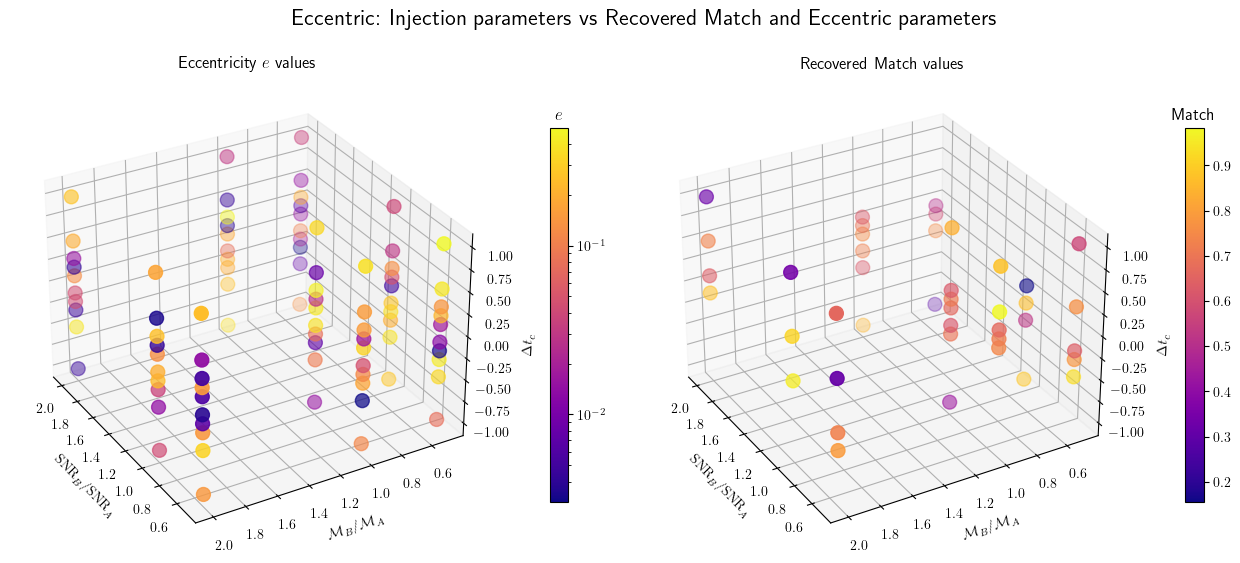

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6), subplot_kw={'projection': '3d'})

scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=e_ecc, edgecolor=None, cmap='plasma', s=100, norm=matplotlib.colors.LogNorm())
clb1 = fig.colorbar(scatter1, ax=axes[0], shrink=0.7, pad=0.1)
clb1.ax.set_title('$e$')

axes[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_zlabel('$\Delta t_c$')
axes[0].set_title('Eccentricity $e$ values', loc='center')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].azim = 150

scatter3 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ecc, edgecolor=None, cmap='plasma', s=100)
clb3 = fig.colorbar(scatter3, ax=axes[1], shrink=0.7, pad=0.1)
clb3.ax.set_title('Match')

axes[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_zlabel('$\Delta t_c$')
axes[1].set_title('Recovered Match values', loc='center')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].azim = 150

fig.suptitle('Eccentric: Injection parameters vs Recovered Match and Eccentric parameters', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/ECC_PARAMS(3D).png')
plt.show()

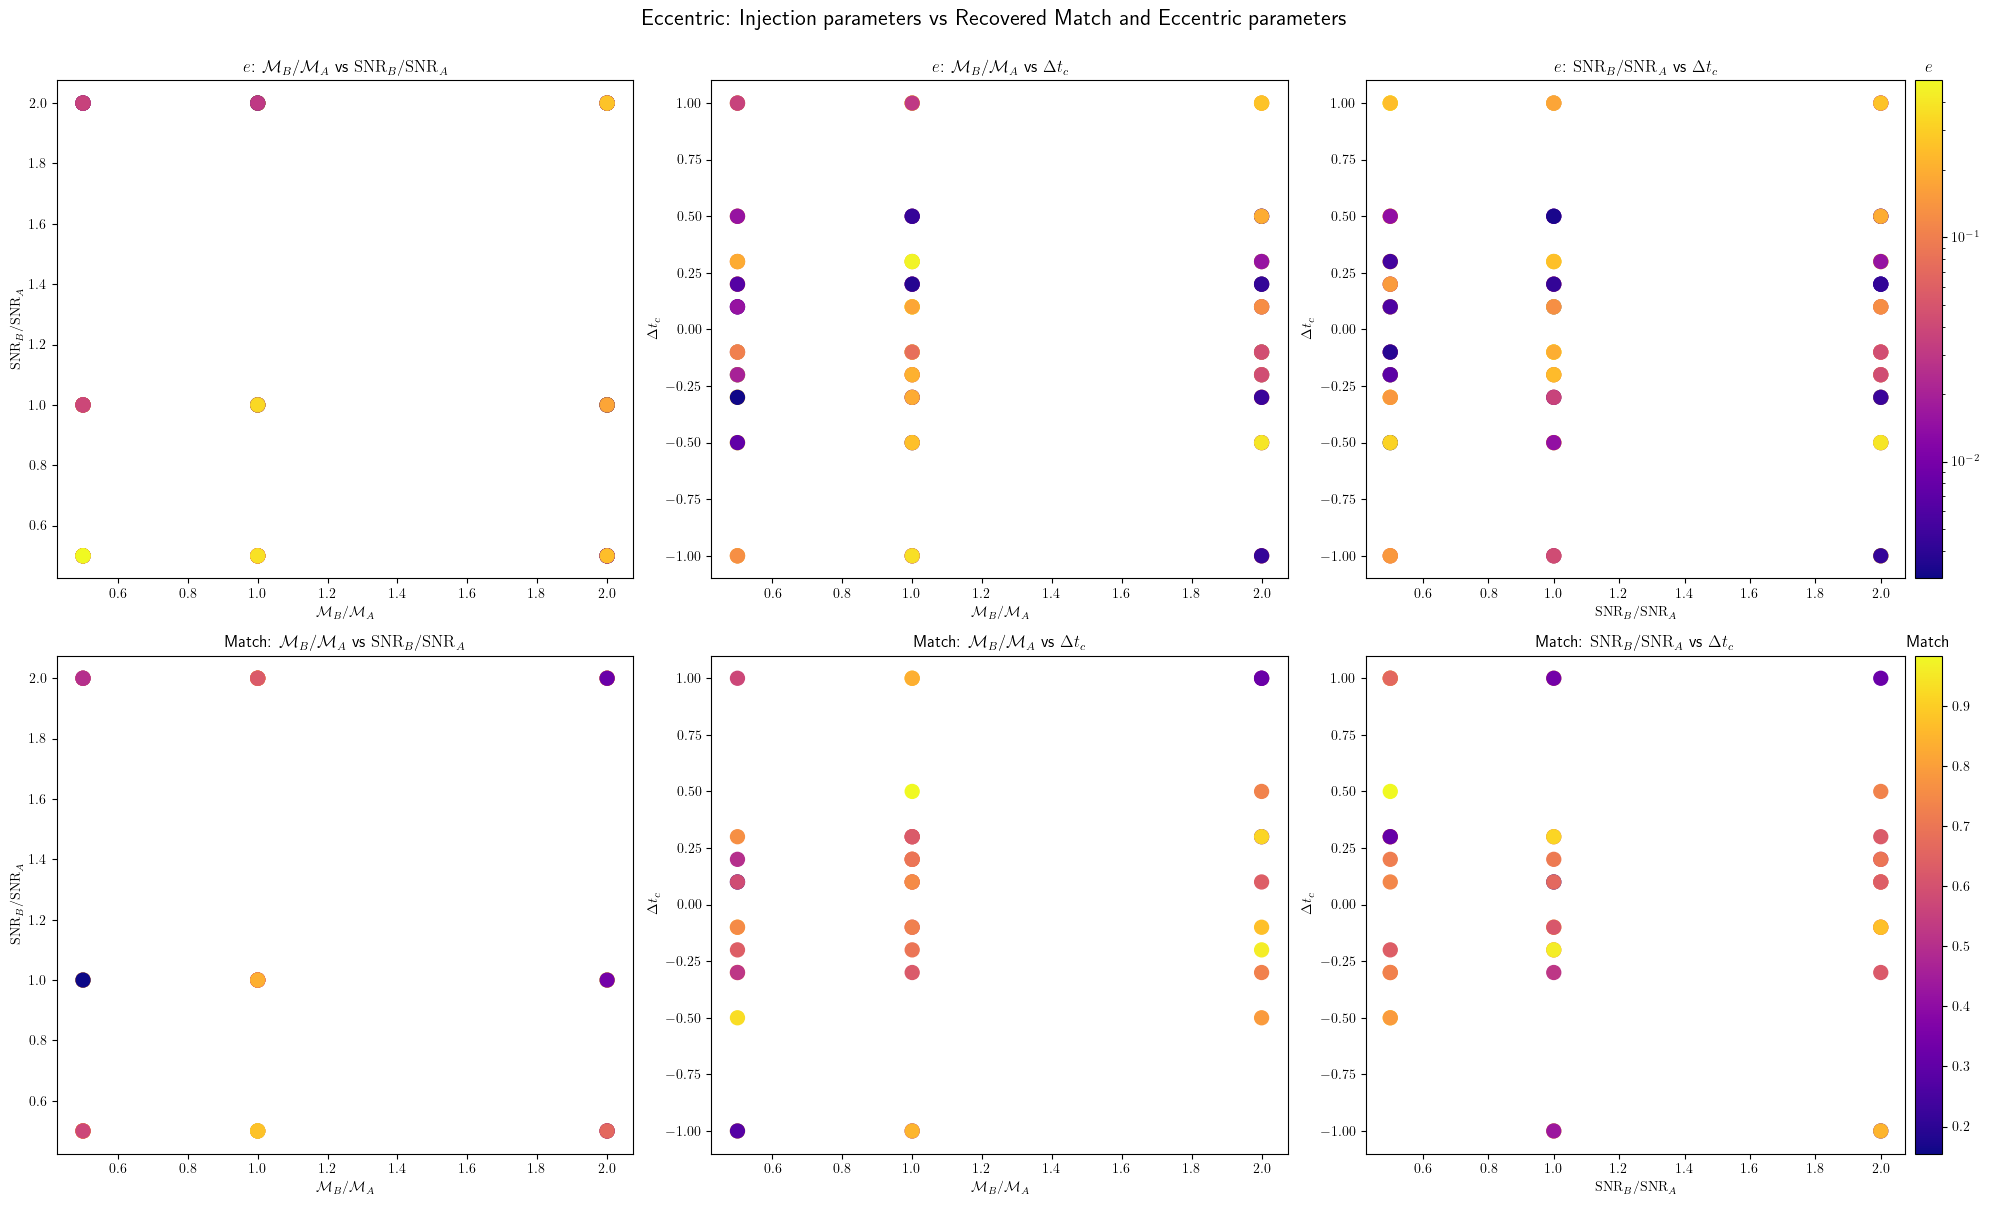

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

scatter11 = axes[0,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=e_ecc, cmap='plasma',s=100, norm=matplotlib.colors.LogNorm())
axes[0,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,0].set_title('$e$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter13 = axes[1,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=match_ecc, cmap='plasma', s=100)
axes[1,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,0].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter21 = axes[0,1].scatter(mchirp_b/mchirp_a, delta_tc, c=e_ecc, cmap='plasma', s=100, norm=matplotlib.colors.LogNorm())
axes[0,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,1].set_ylabel('$\Delta t_c$')
axes[0,1].set_title('$e$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter32 = axes[1,1].scatter(mchirp_b/mchirp_a, delta_tc, c=match_ecc, cmap='plasma', s=100)
axes[1,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,1].set_ylabel('$\Delta t_c$')
axes[1,1].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter31 = axes[0,2].scatter(snr_b/snr_a, delta_tc, c=e_ecc, cmap='plasma', s=100, norm=matplotlib.colors.LogNorm())
divider = make_axes_locatable(axes[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb1 = plt.colorbar(scatter31, cax=cax)
clb1.ax.set_title('$e$')
axes[0,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,2].set_ylabel('$\Delta t_c$')
axes[0,2].set_title('$e$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter33 = axes[1,2].scatter(snr_b/snr_a, delta_tc, c=match_ecc, cmap='plasma', s=100)
divider = make_axes_locatable(axes[1, 2])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb3 = plt.colorbar(scatter33, cax=cax)
clb3.ax.set_title('Match')
axes[1,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,2].set_ylabel('$\Delta t_c$')
axes[1,2].set_title('Match: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

fig.suptitle('Eccentric: Injection parameters vs Recovered Match and Eccentric parameters', fontsize=16, fontweight='bold', y=1)
plt.tight_layout()
plt.savefig('../../output/pe_population/match/ECC_PARAMS(2D).png')
plt.show()

## Singles Recovery

In [18]:
match, mchirp, eta, spin1z, spin2z = np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations)), np.zeros(len(combinations))
for i in range(len(combinations)):
    data = np.load('../../output/pe_population/FF/FF_4D_H1_{}_{}_{}.npy'.format(combinations[i][0], combinations[i][1], combinations[i][2]), allow_pickle=True)
    match[i], mchirp[i], eta[i], spin1z[i], spin2z[i] = data[0], data[1], data[2], data[3], data[4]

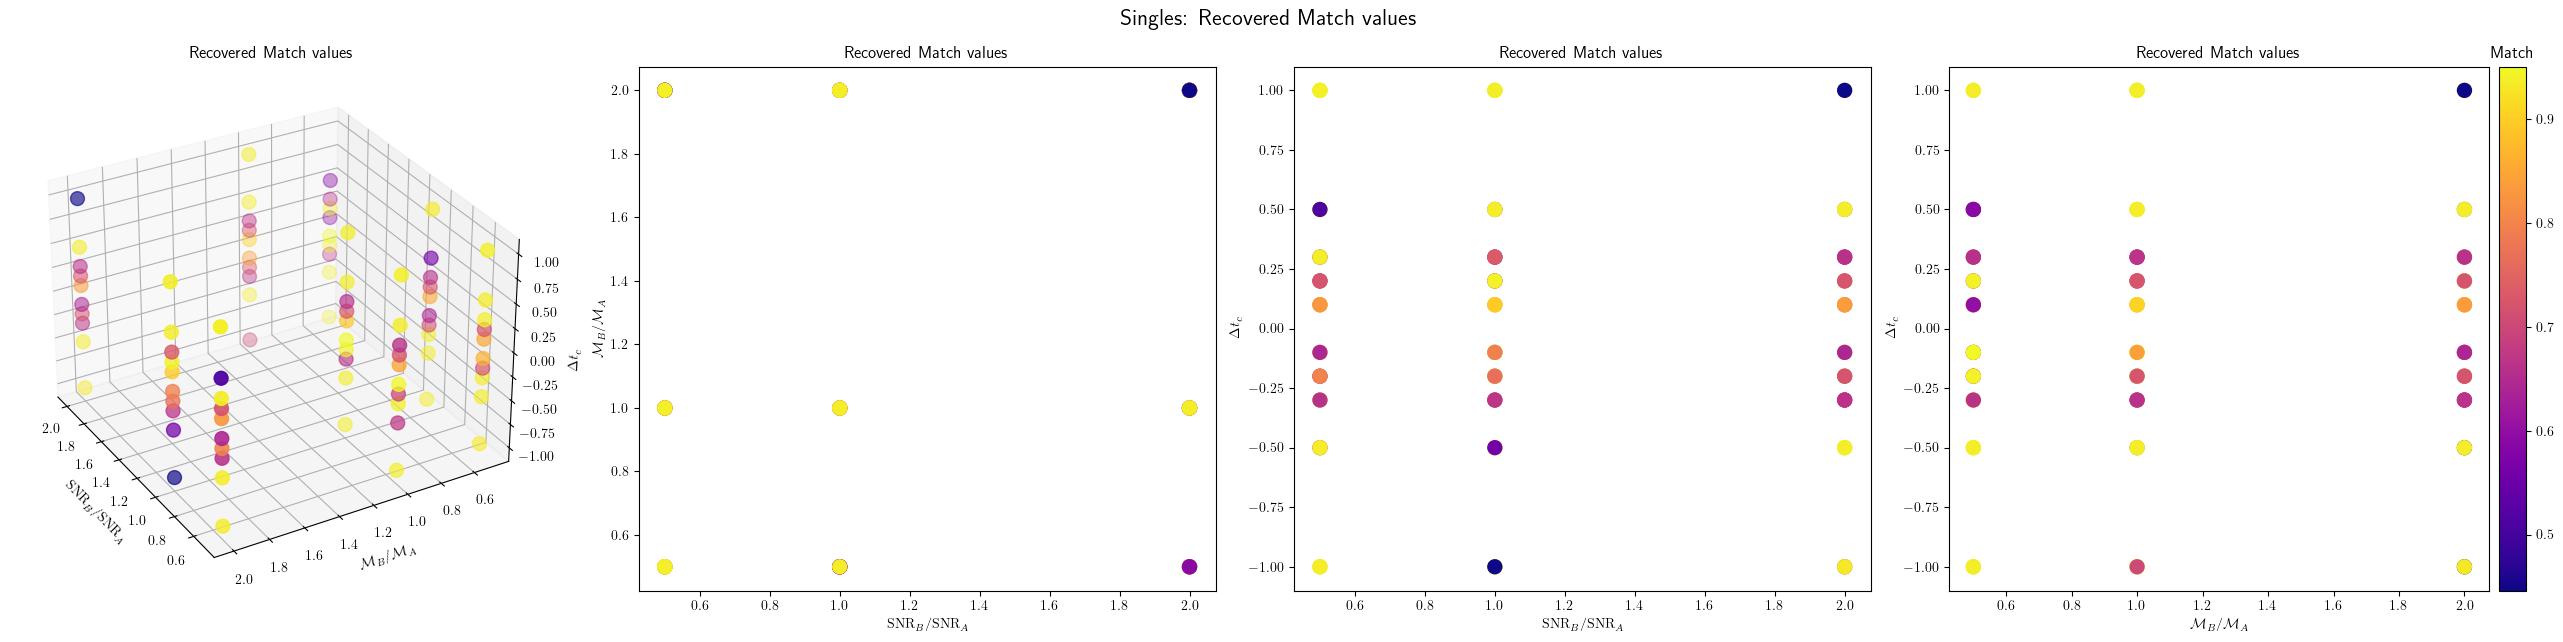

In [19]:
fig = plt.figure(figsize=(26, 6.5))
axs = [None]*4

axs[0] = fig.add_subplot(1, 4, 1, projection='3d')
scatter1 = axs[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match, edgecolor=None, cmap='plasma', s=100)
axs[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axs[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axs[0].set_zlabel('$\Delta t_c$')
axs[0].set_title('Recovered Match values', loc='center')
axs[0].ticklabel_format(useOffset=False, style='plain')
axs[0].azim = 150

axs[1] = fig.add_subplot(1, 4, 2)
scatter2 = axs[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, c=match, edgecolor=None, cmap='plasma', s=100)
axs[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axs[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axs[1].set_title('Recovered Match values', loc='center')
axs[1].ticklabel_format(useOffset=False, style='plain')

fig.subplots_adjust(wspace=0.6)

axs[2] = fig.add_subplot(1, 4, 3)
scatter3 = axs[2].scatter(snr_b/snr_a, delta_tc, c=match, edgecolor=None, cmap='plasma', s=100)
axs[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axs[2].set_ylabel('$\Delta t_c$')
axs[2].set_title('Recovered Match values', loc='center')
axs[2].ticklabel_format(useOffset=False, style='plain')

axs[3] = fig.add_subplot(1, 4, 4)
scatter4 = axs[3].scatter(mchirp_b/mchirp_a, delta_tc, c=match, edgecolor=None, cmap='plasma', s=100)
axs[3].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axs[3].set_ylabel('$\Delta t_c$')
axs[3].set_title('Recovered Match values', loc='center')
axs[3].ticklabel_format(useOffset=False, style='plain')

divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.1)
clb2 = plt.colorbar(scatter3, cax=cax)
clb2.ax.set_title('Match')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

plt.suptitle('Singles: Recovered Match values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/MATCH(3D).png')
plt.show()

### Comparisions

In [20]:
bias_mchirp_a = np.abs(mchirp-mchirp_a)/mchirp_a*100
bias_mchirp_b = np.abs(mchirp-mchirp_b)/mchirp_b*100

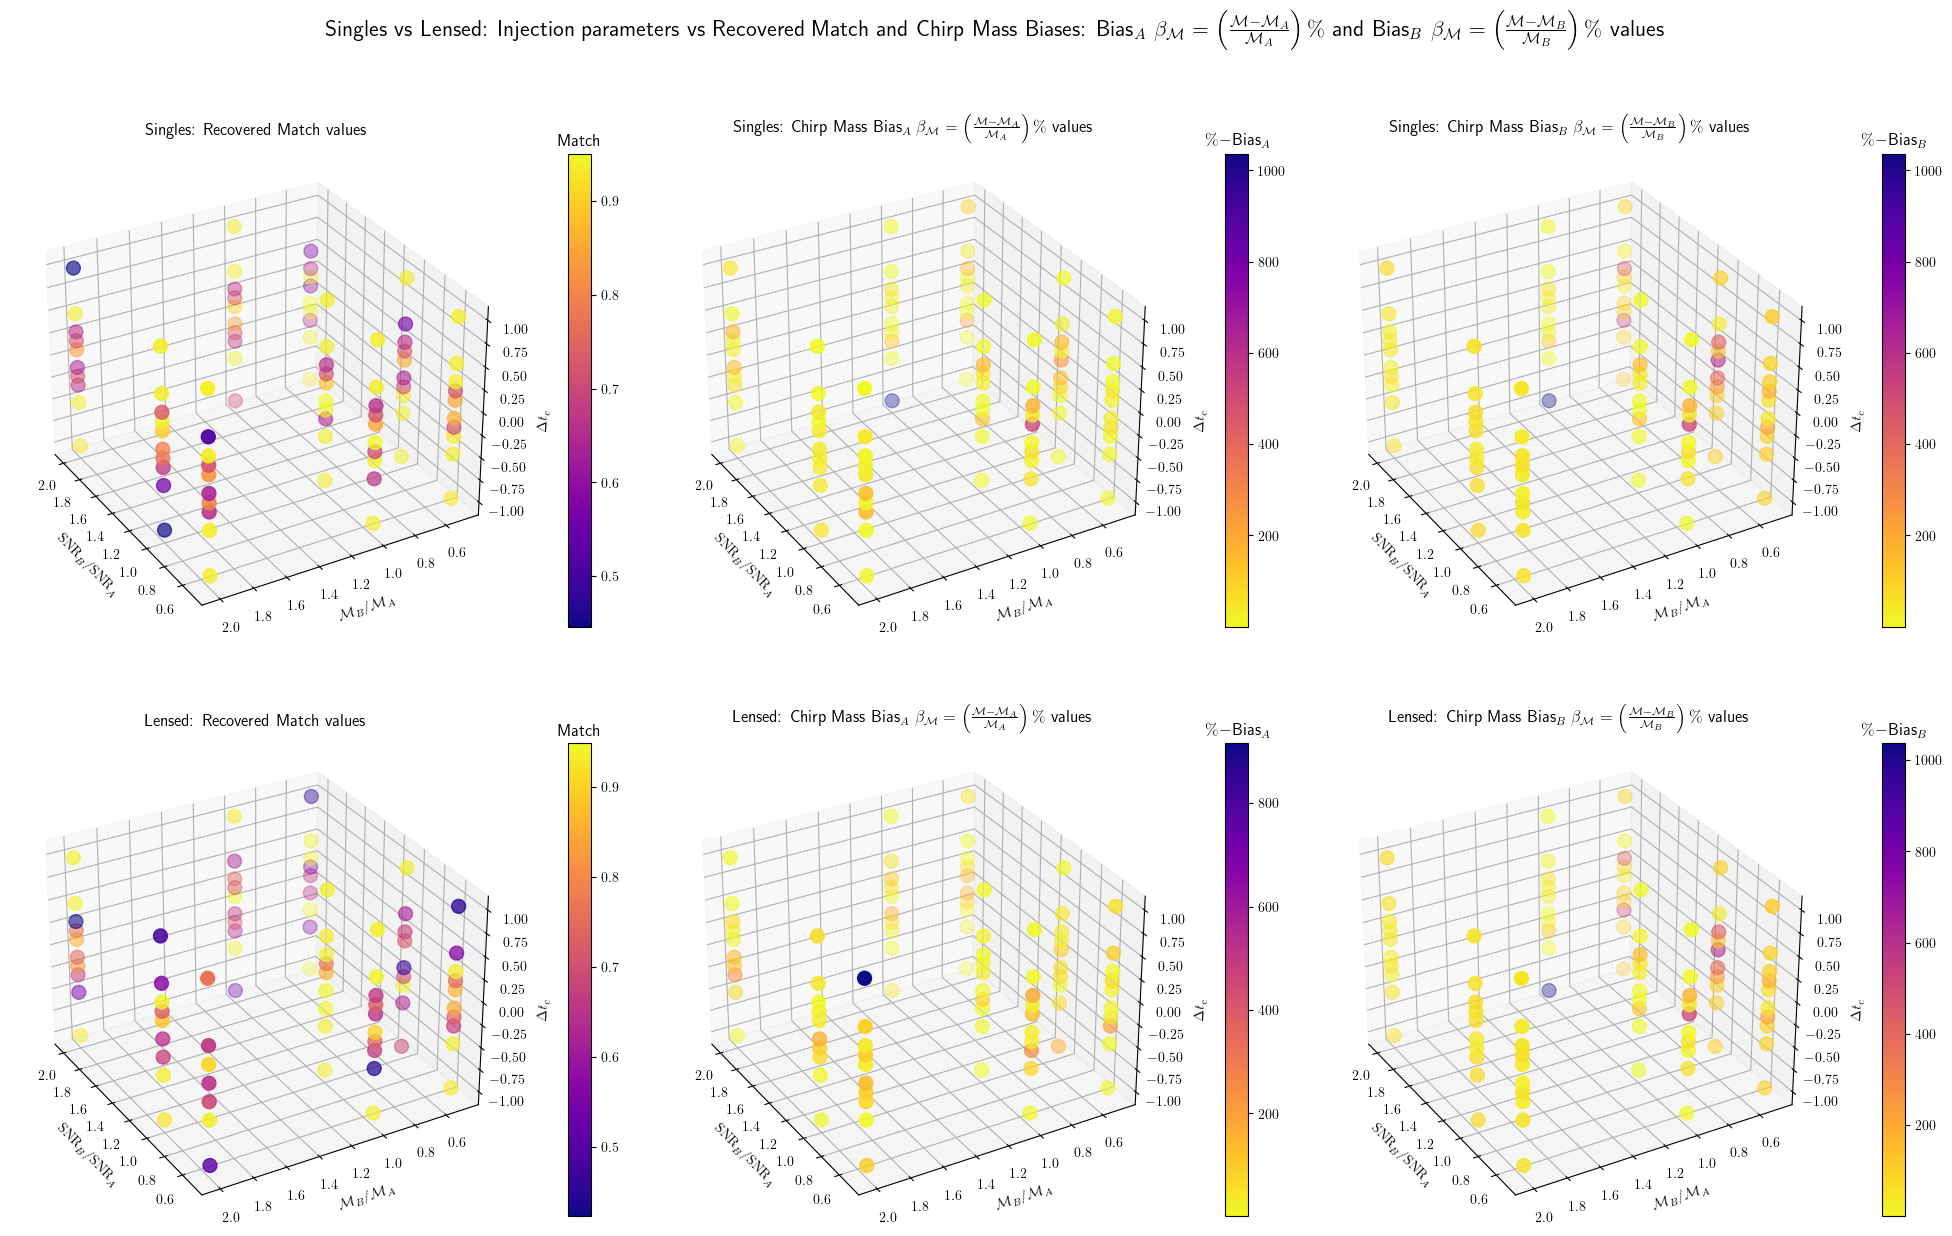

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(20, 13.5), subplot_kw={'projection': '3d'})

scatter1 = axes[0,0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match, edgecolor=None, cmap='plasma', s=100)
clb0 = fig.colorbar(scatter1, ax=axes[0,0], shrink=0.7, pad=0.1)
clb0.ax.set_title('Match')
clb0.ax.ticklabel_format(useOffset=False, style='plain')

axes[0,0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,0].set_zlabel('$\Delta t_c$')
axes[0,0].ticklabel_format(useOffset=False, style='plain')
axes[0,0].azim = 150
axes[0,0].set_title('Singles: Recovered Match values', loc='center')

ax1 = axes[0,1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_a, cmap='plasma_r', s=100)
clb1 = plt.colorbar(ax1, ax=axes[0,1], shrink=0.7, norm=None, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')
clb1.ax.ticklabel_format(useOffset=False, style='plain')

axes[0,1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,1].set_zlabel('$\Delta t_c$')
axes[0,1].ticklabel_format(useOffset=False, style='plain')
axes[0,1].azim = 150
axes[0,1].set_title('Singles: Chirp Mass Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', loc='center')

ax2 = axes[0,2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, cmap='plasma_r', s=100)
clb2 = plt.colorbar(ax2, ax=axes[0,2], shrink=0.7, norm=None, pad=0.1)
clb2.ax.set_title('$\\%-$Bias$_B$')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

axes[0,2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,2].set_zlabel('$\Delta t_c$')
axes[0,2].ticklabel_format(useOffset=False, style='plain')
axes[0,2].azim = 150
axes[0,2].set_title('Singles: Chirp Mass Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')

scatter2 = axes[1,0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ml, edgecolor=None, cmap='plasma', s=100)
clb2 = fig.colorbar(scatter2, ax=axes[1,0], shrink=0.7, pad=0.1)
clb2.ax.set_title('Match')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

axes[1,0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,0].set_zlabel('$\Delta t_c$')
axes[1,0].ticklabel_format(useOffset=False, style='plain')
axes[1,0].azim = 150
axes[1,0].set_title('Lensed: Recovered Match values', loc='center')

ax3 = axes[1,1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_a_ml, cmap='plasma_r', s=100)
clb3 = plt.colorbar(ax3, ax=axes[1,1], shrink=0.7, norm=None, pad=0.1)
clb3.ax.set_title('$\\%-$Bias$_A$')
clb3.ax.ticklabel_format(useOffset=False, style='plain')

axes[1,1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,1].set_zlabel('$\Delta t_c$')
axes[1,1].ticklabel_format(useOffset=False, style='plain')
axes[1,1].azim = 150
axes[1,1].set_title('Lensed: Chirp Mass Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', loc='center')

ax4 = axes[1,2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, cmap='plasma_r', s=100)
clb4 = plt.colorbar(ax4, ax=axes[1,2], shrink=0.7, norm=None, pad=0.1)
clb4.ax.set_title('$\\%-$Bias$_B$')
clb4.ax.ticklabel_format(useOffset=False, style='plain')

axes[1,2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,2].set_zlabel('$\Delta t_c$')
axes[1,2].ticklabel_format(useOffset=False, style='plain')
axes[1,2].azim = 150
axes[1,2].set_title('Lensed: Chirp Mass Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')

fig.suptitle('Singles vs Lensed: Injection parameters vs Recovered Match and Chirp Mass Biases: Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ and Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/LENS_COMPARISION.png')
plt.show()

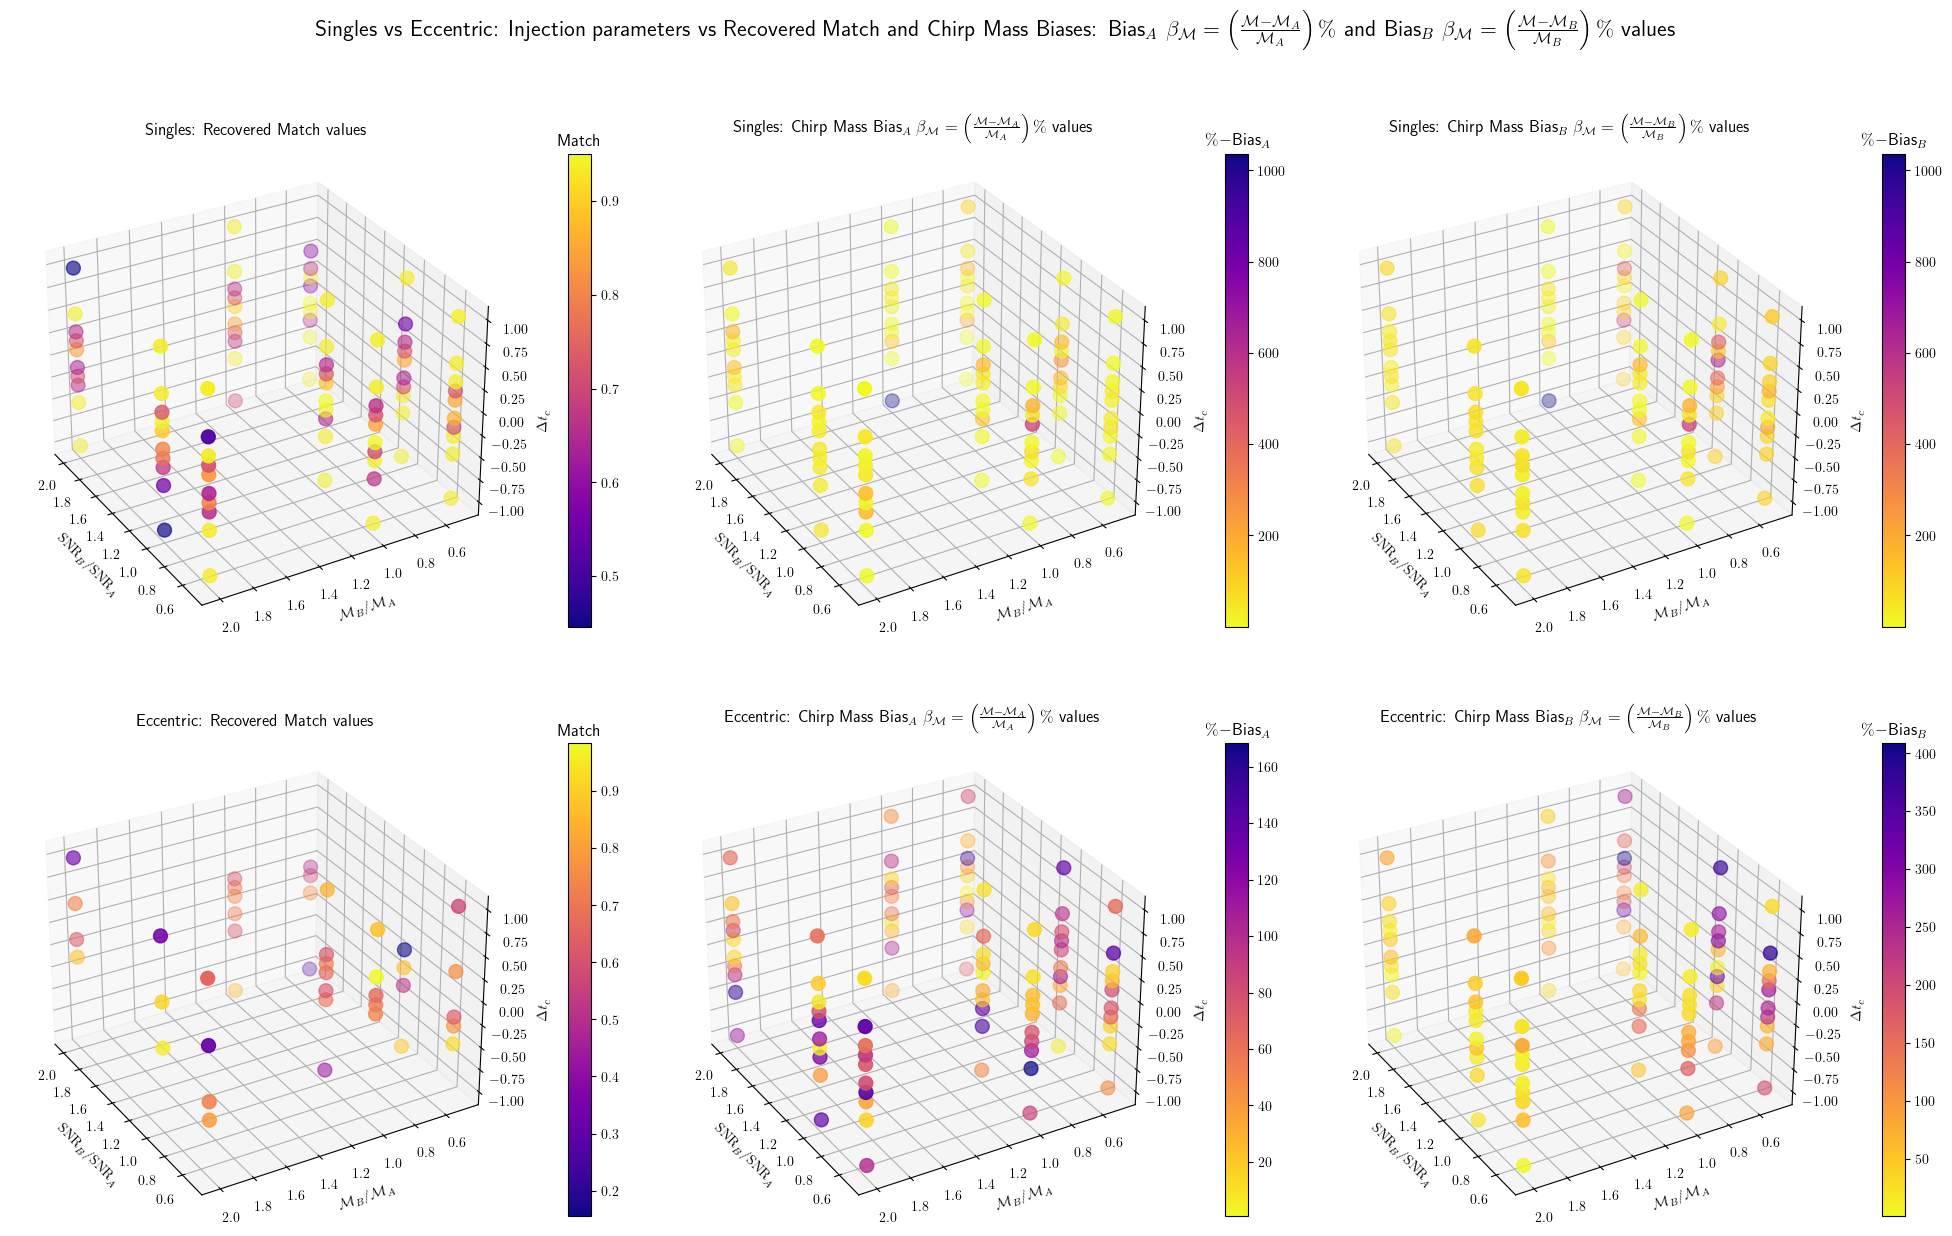

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(20, 13.5), subplot_kw={'projection': '3d'})

scatter1 = axes[0,0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match, edgecolor=None, cmap='plasma', s=100)
clb0 = fig.colorbar(scatter1, ax=axes[0,0], shrink=0.7, pad=0.1)
clb0.ax.set_title('Match')
clb0.ax.ticklabel_format(useOffset=False, style='plain')

axes[0,0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,0].set_zlabel('$\Delta t_c$')
axes[0,0].ticklabel_format(useOffset=False, style='plain')
axes[0,0].azim = 150
axes[0,0].set_title('Singles: Recovered Match values', loc='center')

ax1 = axes[0,1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_a, cmap='plasma_r', s=100)
clb1 = plt.colorbar(ax1, ax=axes[0,1], shrink=0.7, norm=None, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')
clb1.ax.ticklabel_format(useOffset=False, style='plain')

axes[0,1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,1].set_zlabel('$\Delta t_c$')
axes[0,1].ticklabel_format(useOffset=False, style='plain')
axes[0,1].azim = 150
axes[0,1].set_title('Singles: Chirp Mass Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', loc='center')

ax2 = axes[0,2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, cmap='plasma_r', s=100)
clb2 = plt.colorbar(ax2, ax=axes[0,2], shrink=0.7, norm=None, pad=0.1)
clb2.ax.set_title('$\\%-$Bias$_B$')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

axes[0,2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,2].set_zlabel('$\Delta t_c$')
axes[0,2].ticklabel_format(useOffset=False, style='plain')
axes[0,2].azim = 150
axes[0,2].set_title('Singles: Chirp Mass Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')

scatter2 = axes[1,0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ecc, edgecolor=None, cmap='plasma', s=100)
clb2 = fig.colorbar(scatter2, ax=axes[1,0], shrink=0.7, pad=0.1)
clb2.ax.set_title('Match')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

axes[1,0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,0].set_zlabel('$\Delta t_c$')
axes[1,0].ticklabel_format(useOffset=False, style='plain')
axes[1,0].azim = 150
axes[1,0].set_title('Eccentric: Recovered Match values', loc='center')

ax3 = axes[1,1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_a_ecc, cmap='plasma_r', s=100)
clb3 = plt.colorbar(ax3, ax=axes[1,1], shrink=0.7, norm=None, pad=0.1)
clb3.ax.set_title('$\\%-$Bias$_A$')
clb3.ax.ticklabel_format(useOffset=False, style='plain')

axes[1,1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,1].set_zlabel('$\Delta t_c$')
axes[1,1].ticklabel_format(useOffset=False, style='plain')
axes[1,1].azim = 150
axes[1,1].set_title('Eccentric: Chirp Mass Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', loc='center')

ax4 = axes[1,2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b_ecc, cmap='plasma_r', s=100)
clb4 = plt.colorbar(ax4, ax=axes[1,2], shrink=0.7, norm=None, pad=0.1)
clb4.ax.set_title('$\\%-$Bias$_B$')
clb4.ax.ticklabel_format(useOffset=False, style='plain')

axes[1,2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,2].set_zlabel('$\Delta t_c$')
axes[1,2].ticklabel_format(useOffset=False, style='plain')
axes[1,2].azim = 150
axes[1,2].set_title('Eccentric: Chirp Mass Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')

fig.suptitle('Singles vs Eccentric: Injection parameters vs Recovered Match and Chirp Mass Biases: Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ and Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/ECC_COMPARISION.png')
plt.show()

/tmp/ipykernel_8090/1683643046.py:3: RuntimeWarning: invalid value encountered in subtract
  scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ecc-match, edgecolor=None, cmap='viridis', s=100)
/tmp/ipykernel_8090/1683643046.py:27: RuntimeWarning: invalid value encountered in subtract
  scatter3 = axes[2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ecc-match_ml, edgecolor=None, cmap='viridis', s=100)


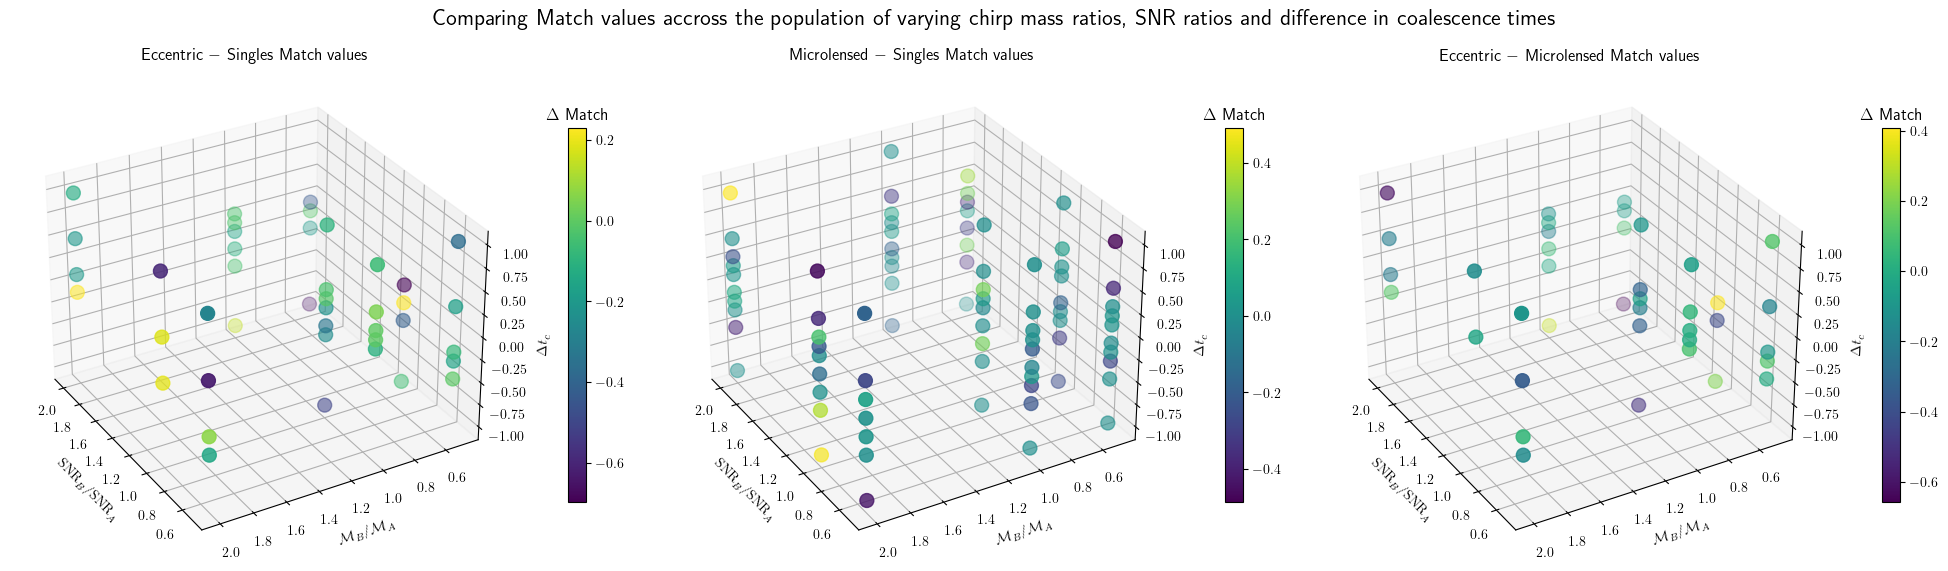

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})

scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ecc-match, edgecolor=None, cmap='viridis', s=100)
clb1 = fig.colorbar(scatter1, ax=axes[0], shrink=0.7, pad=0.1)
clb1.ax.set_title('$\Delta$ Match')
clb1.ax.ticklabel_format(useOffset=False, style='plain')

axes[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_zlabel('$\Delta t_c$')
axes[0].set_title('Eccentric $-$ Singles Match values', loc='center')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].azim = 150

scatter2 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ml-match, edgecolor=None, cmap='viridis', s=100)
clb2 = fig.colorbar(scatter2, ax=axes[1], shrink=0.7, pad=0.1)
clb2.ax.set_title('$\\Delta$ Match')
clb2.ax.ticklabel_format(useOffset=False, style='plain')

axes[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_zlabel('$\Delta t_c$')
axes[1].set_title('Microlensed $-$ Singles Match values', loc='center')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].azim = 150

scatter3 = axes[2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_ecc-match_ml, edgecolor=None, cmap='viridis', s=100)
clb3 = fig.colorbar(scatter3, ax=axes[2], shrink=0.7, pad=0.1)
clb3.ax.set_title('$\Delta$ Match')
clb3.ax.ticklabel_format(useOffset=False, style='plain')

axes[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2].set_zlabel('$\Delta t_c$')
axes[2].set_title('Eccentric $-$ Microlensed Match values', loc='center')
axes[2].ticklabel_format(useOffset=False, style='plain')
axes[2].azim = 150

fig.suptitle('Comparing Match values accross the population of varying chirp mass ratios, SNR ratios and difference in coalescence times', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/DIFFERENCE(3D).png')
plt.show()

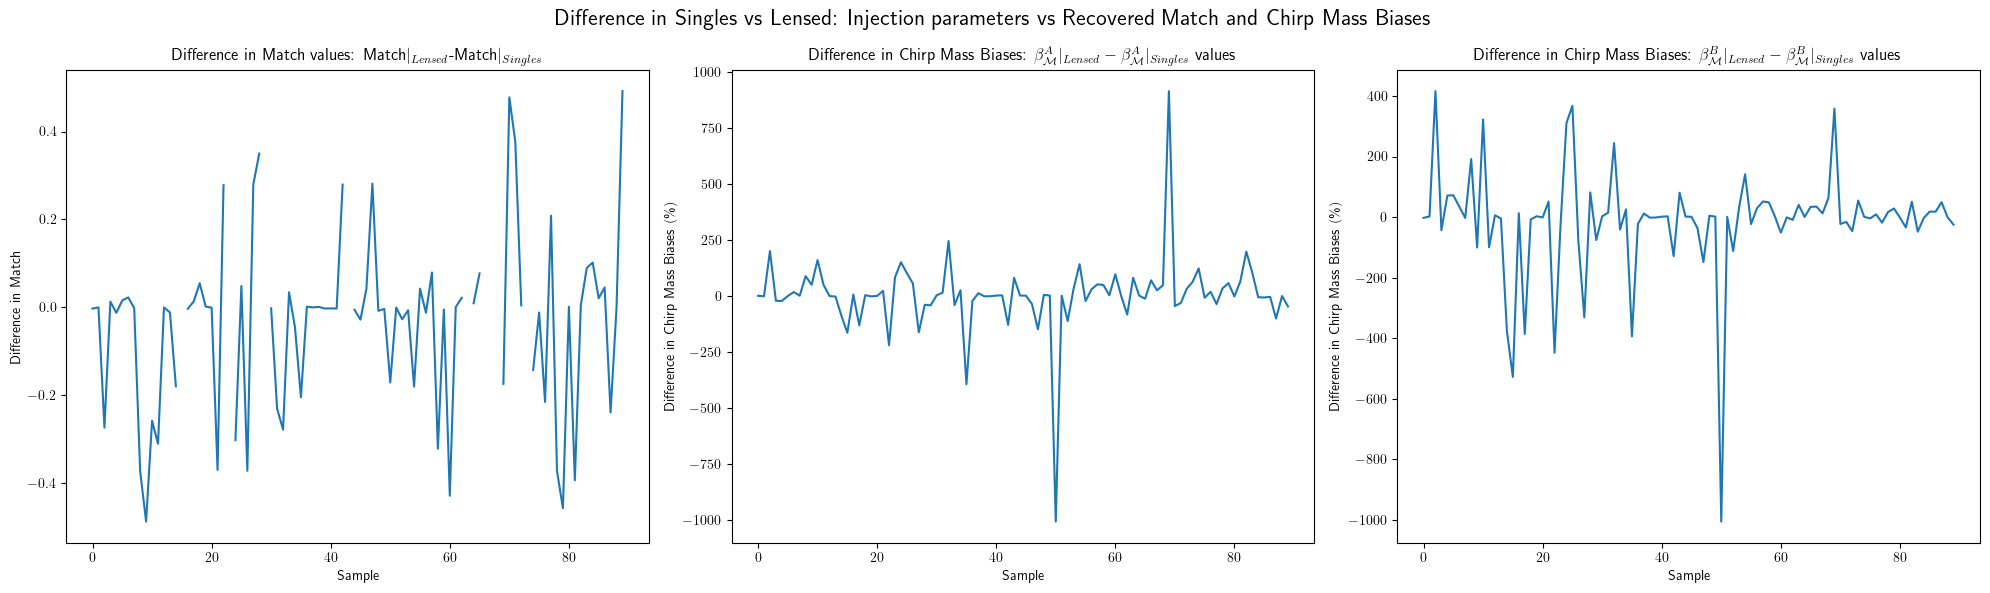

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

ax0 = axes[0].plot(match_ml-match)
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Difference in Match')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].set_title('Difference in Match values: Match$|_{Lensed}$-Match$|_{Singles}$', loc='center')

ax1 = axes[1].plot(bias_mchirp_a_ml-bias_mchirp_a)
axes[1].set_xlabel('Sample')
axes[1].set_ylabel('Difference in Chirp Mass Biases $($\\%$)$')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].set_title('Difference in Chirp Mass Biases: $\\beta^A_{\\mathcal{M}}|_{{Lensed}}-\\beta^A_{\\mathcal{M}}|_{{Singles}}$ values', loc='center')

ax2 = axes[2].plot(bias_mchirp_b_ml-bias_mchirp_b)
axes[2].set_xlabel('Sample')
axes[2].set_ylabel('Difference in Chirp Mass Biases $($\\%$)$')
axes[2].ticklabel_format(useOffset=False, style='plain')
axes[2].set_title('Difference in Chirp Mass Biases: $\\beta^B_{\\mathcal{M}}|_{{Lensed}}-\\beta^B_{\\mathcal{M}}|_{{Singles}}$ values', loc='center')

fig.suptitle('Difference in Singles vs Lensed: Injection parameters vs Recovered Match and Chirp Mass Biases', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/LENS_DIFFERENCE(2D).png')
plt.show()

/tmp/ipykernel_8090/2072871471.py:3: RuntimeWarning: invalid value encountered in subtract
  ax0 = axes[0].plot(match_ecc-match)


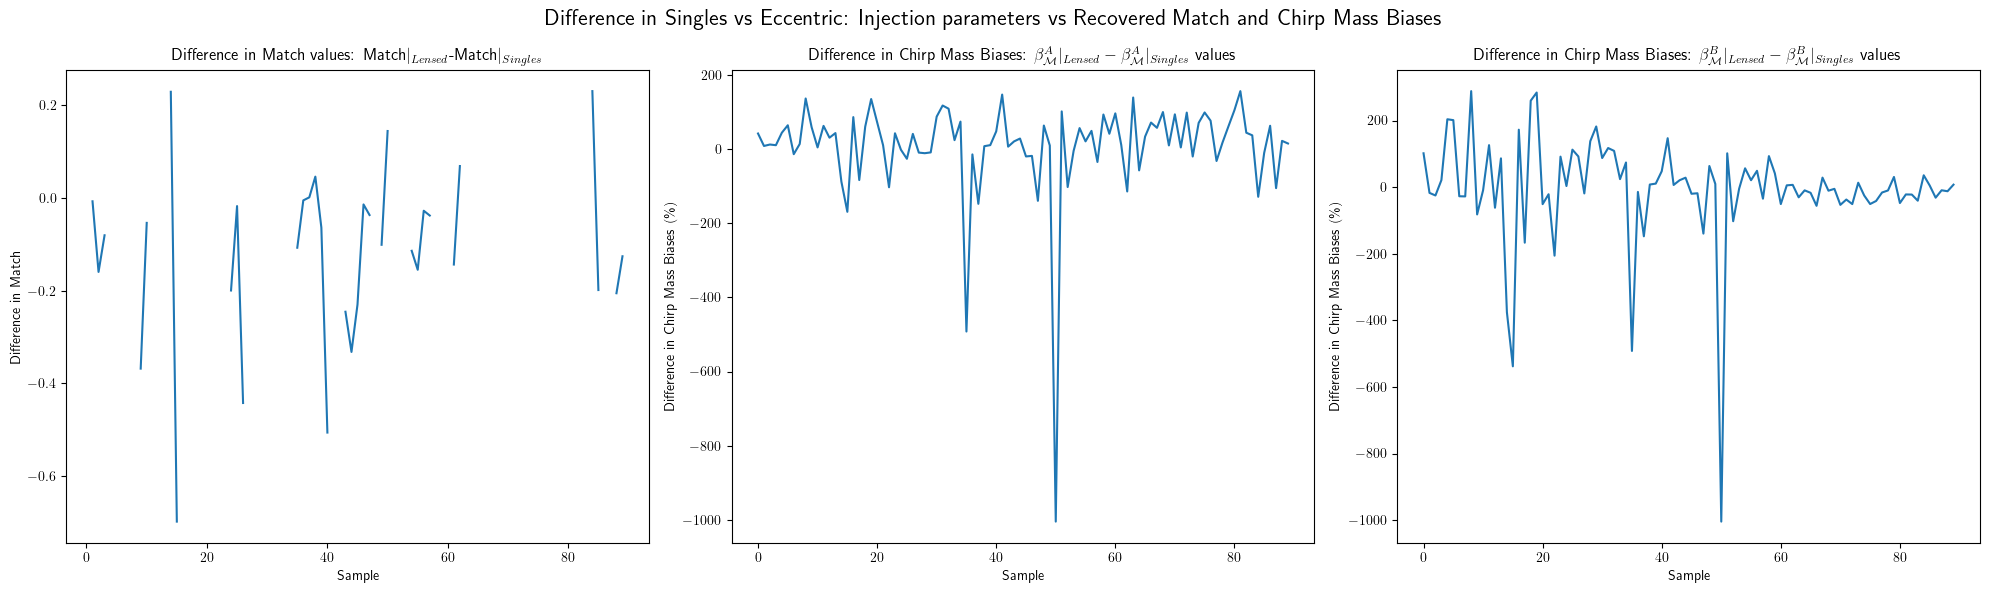

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

ax0 = axes[0].plot(match_ecc-match)
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Difference in Match')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].set_title('Difference in Match values: Match$|_{Lensed}$-Match$|_{Singles}$', loc='center')

ax1 = axes[1].plot(bias_mchirp_a_ecc-bias_mchirp_a)
axes[1].set_xlabel('Sample')
axes[1].set_ylabel('Difference in Chirp Mass Biases $($\\%$)$')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].set_title('Difference in Chirp Mass Biases: $\\beta^A_{\\mathcal{M}}|_{{Lensed}}-\\beta^A_{\\mathcal{M}}|_{{Singles}}$ values', loc='center')

ax2 = axes[2].plot(bias_mchirp_b_ecc-bias_mchirp_b)
axes[2].set_xlabel('Sample')
axes[2].set_ylabel('Difference in Chirp Mass Biases $($\\%$)$')
axes[2].ticklabel_format(useOffset=False, style='plain')
axes[2].set_title('Difference in Chirp Mass Biases: $\\beta^B_{\\mathcal{M}}|_{{Lensed}}-\\beta^B_{\\mathcal{M}}|_{{Singles}}$ values', loc='center')

fig.suptitle('Difference in Singles vs Eccentric: Injection parameters vs Recovered Match and Chirp Mass Biases', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/pe_population/match/ECC_DIFFERENCE(2D).png')
plt.show()